In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import *
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.integrate import simps
import warnings
import scipy.stats
import pywt

In [398]:
#Reading Data for all the patients

#Data for Patient 1
CGMDateNumLunchPat1 = pd.read_csv('Desktop/DataFolder/CGMDatenumLunchPat1.csv');
CGMSeriesLunchPat1 = pd.read_csv('Desktop/DataFolder/CGMSeriesLunchPat1.csv');
InsulinBasalLunchPat1 = pd.read_csv('Desktop/DataFolder/InsulinBasalLunchPat1.csv');
InsulinBolusLunchPat1 = pd.read_csv('Desktop/DataFolder/InsulinBolusLunchPat1.csv');
InsulinDatenumLunchPat1 = pd.read_csv('Desktop/DataFolder/InsulinDateNumLunchPat1.csv');

#Data for Patient 2
CGMDateNumLunchPat2 = pd.read_csv('Desktop/DataFolder/CGMDatenumLunchPat2.csv');
CGMSeriesLunchPat2 = pd.read_csv('Desktop/DataFolder/CGMSeriesLunchPat2.csv');
InsulinBasalLunchPat2 = pd.read_csv('Desktop/DataFolder/InsulinBasalLunchPat2.csv');
InsulinBolusLunchPat2 = pd.read_csv('Desktop/DataFolder/InsulinBolusLunchPat2.csv');
InsulinDatenumLunchPat2 = pd.read_csv('Desktop/DataFolder/InsulinDateNumLunchPat2.csv');

#Data for Patient 3
CGMDateNumLunchPat3 = pd.read_csv('Desktop/DataFolder/CGMDatenumLunchPat3.csv');
CGMSeriesLunchPat3 = pd.read_csv('Desktop/DataFolder/CGMSeriesLunchPat3.csv');
InsulinBasalLunchPat3 = pd.read_csv('Desktop/DataFolder/InsulinBasalLunchPat3.csv');
InsulinBolusLunchPat3 = pd.read_csv('Desktop/DataFolder/InsulinBolusLunchPat3.csv');
InsulinDatenumLunchPat3 = pd.read_csv('Desktop/DataFolder/InsulinDateNumLunchPat3.csv');

#Data for Patient 4
CGMDateNumLunchPat4 = pd.read_csv('Desktop/DataFolder/CGMDatenumLunchPat4.csv');
CGMSeriesLunchPat4 = pd.read_csv('Desktop/DataFolder/CGMSeriesLunchPat4.csv');
InsulinBasalLunchPat4 = pd.read_csv('Desktop/DataFolder/InsulinBasalLunchPat4.csv');
InsulinBolusLunchPat4 = pd.read_csv('Desktop/DataFolder/InsulinBolusLunchPat4.csv');
InsulinDatenumLunchPat4 = pd.read_csv('Desktop/DataFolder/InsulinDateNumLunchPat4.csv');

#Data for Patient 5
CGMDateNumLunchPat5 = pd.read_csv('Desktop/DataFolder/CGMDatenumLunchPat5.csv');
CGMSeriesLunchPat5 = pd.read_csv('Desktop/DataFolder/CGMSeriesLunchPat5.csv');
InsulinBasalLunchPat5 = pd.read_csv('Desktop/DataFolder/InsulinBasalLunchPat5.csv');
InsulinBolusLunchPat5 = pd.read_csv('Desktop/DataFolder/InsulinBolusLunchPat5.csv');
InsulinDatenumLunchPat5 = pd.read_csv('Desktop/DataFolder/InsulinDateNumLunchPat5.csv');

In [404]:
# preprocessing to remove NaN
dfd = CGMSeriesLunchPat1['cgmSeries_31']
CGMSeriesLunchPat1['cgmSeries_31'] = dfd.replace(np.NaN, CGMSeriesLunchPat1['cgmSeries_30'] + (CGMSeriesLunchPat1['cgmSeries_30'] - CGMSeriesLunchPat1['cgmSeries_29']))
CGMDateNumLunchPat1['cgmDatenum_31'] = CGMDateNumLunchPat1['cgmDatenum_30'] - 0.0035

CGMSeriesLunchPat4 = CGMSeriesLunchPat4.iloc[:,0:30].dropna()
CGMSeriesLunchPat3 = CGMSeriesLunchPat3.iloc[:,0:30].dropna()
CGMSeriesLunchPat2 = CGMSeriesLunchPat2.iloc[:,0:30].dropna()
CGMSeriesLunchPat5 = CGMSeriesLunchPat5.iloc[:,0:30].dropna()
CGMDateNumLunchPat4 = CGMDateNumLunchPat4.iloc[:,0:30].dropna()


# preprocessing to remove NaN
CGMSeriesLunchPat2['cgmSeries_31'] = dfd.replace(np.NaN, CGMSeriesLunchPat2['cgmSeries_30'] + (CGMSeriesLunchPat2['cgmSeries_30'] - CGMSeriesLunchPat2['cgmSeries_29']))
CGMDateNumLunchPat2['cgmDatenum_31'] = CGMDateNumLunchPat2['cgmDatenum_30'] - 0.0035

CGMSeriesLunchPat3['cgmSeries_31'] = dfd.replace(np.NaN, CGMSeriesLunchPat3['cgmSeries_30'] + (CGMSeriesLunchPat3['cgmSeries_30'] - CGMSeriesLunchPat3['cgmSeries_29']))
CGMDateNumLunchPat3['cgmDatenum_31'] = CGMDateNumLunchPat3['cgmDatenum_30'] - 0.0035

CGMSeriesLunchPat4['cgmSeries_31'] = dfd.replace(np.NaN, CGMSeriesLunchPat4['cgmSeries_30'] + (CGMSeriesLunchPat4['cgmSeries_30'] - CGMSeriesLunchPat4['cgmSeries_29']))
CGMDateNumLunchPat4['cgmDatenum_31'] = CGMDateNumLunchPat4['cgmDatenum_30'] - 0.0035

CGMSeriesLunchPat5['cgmSeries_31'] = dfd.replace(np.NaN, CGMSeriesLunchPat5['cgmSeries_30'] + (CGMSeriesLunchPat5['cgmSeries_30'] - CGMSeriesLunchPat5['cgmSeries_29']))
CGMDateNumLunchPat5['cgmDatenum_31'] = CGMDateNumLunchPat5['cgmDatenum_30'] - 0.0035

#len(CGMSeriesLunchPat1) + len(CGMSeriesLunchPat2) + len(CGMSeriesLunchPat3) + len(CGMSeriesLunchPat4) + len(CGMSeriesLunchPat5)

# Second Round of preprocessing to remove unidentified nan in different formats
# CGMSeriesLunchPat2['cgmSeries_31'][np.isnan(dd['cgmSeries_31'])] = CGMSeriesLunchPat2['cgmSeries_30'] + (CGMSeriesLunchPat2['cgmSeries_30'] - CGMSeriesLunchPat2['cgmSeries_29'])


#Replacing any Nan
CGMSeriesLunchPat1 = CGMSeriesLunchPat1.fillna(value=0)

In [419]:
#Scaling Data for all the patients

scaler = MinMaxScaler(feature_range=(0,1))

#Scaling CGM Data
CGMSeriesLunchPat1Scaled = scaler.fit_transform(CGMSeriesLunchPat1)
CGMSeriesLunchPat2Scaled = scaler.fit_transform(CGMSeriesLunchPat2)
CGMSeriesLunchPat3Scaled = scaler.fit_transform(CGMSeriesLunchPat3)
CGMSeriesLunchPat4Scaled = scaler.fit_transform(CGMSeriesLunchPat4)
CGMSeriesLunchPat5Scaled = scaler.fit_transform(CGMSeriesLunchPat5)

#Scaling Bolus Data
InsulinBolusLunchPat1Scaled = scaler.fit_transform(InsulinBolusLunchPat1)
InsulinBolusLunchPat2Scaled = scaler.fit_transform(InsulinBolusLunchPat2)
InsulinBolusLunchPat3Scaled = scaler.fit_transform(InsulinBolusLunchPat3)
InsulinBolusLunchPat4Scaled = scaler.fit_transform(InsulinBolusLunchPat4)
InsulinBolusLunchPat5Scaled = scaler.fit_transform(InsulinBolusLunchPat5)


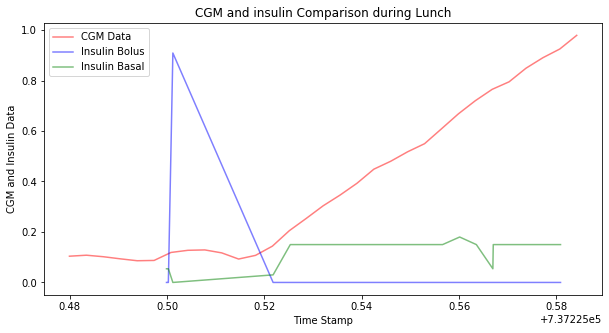

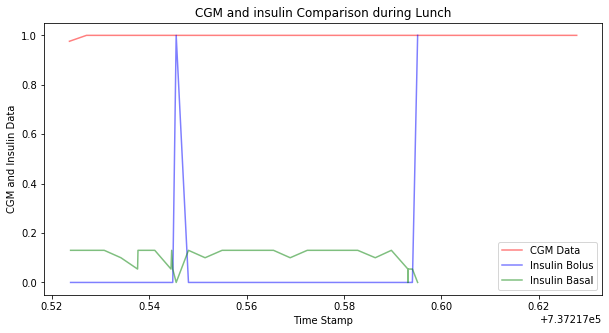

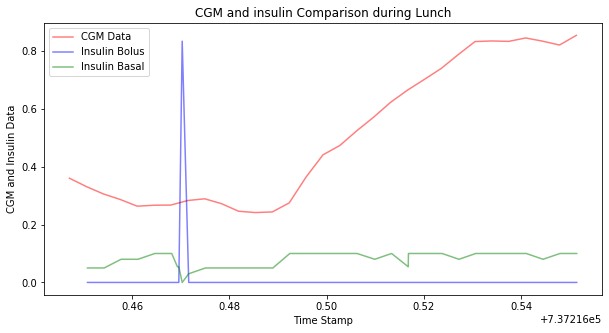

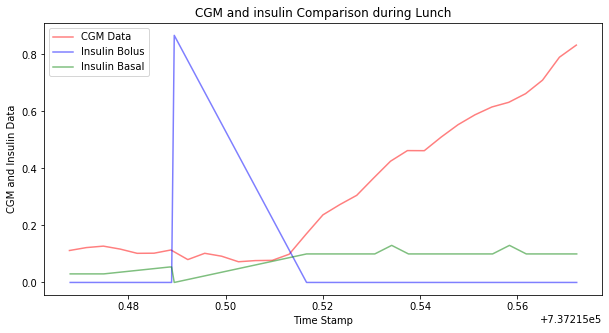

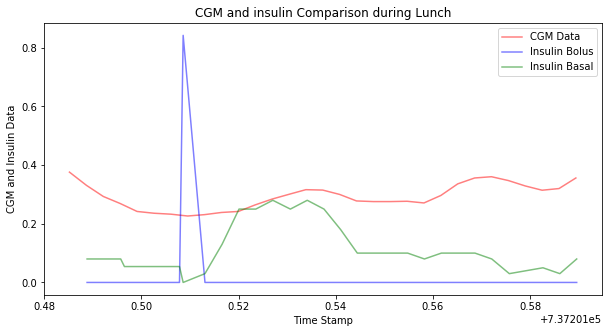

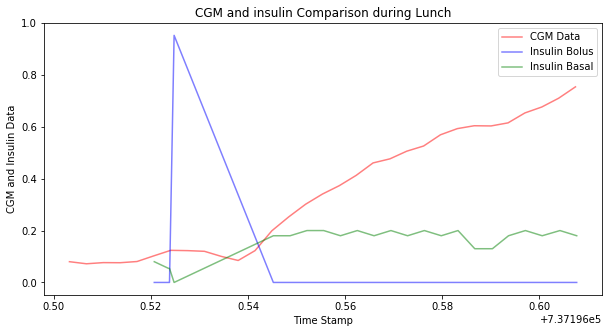

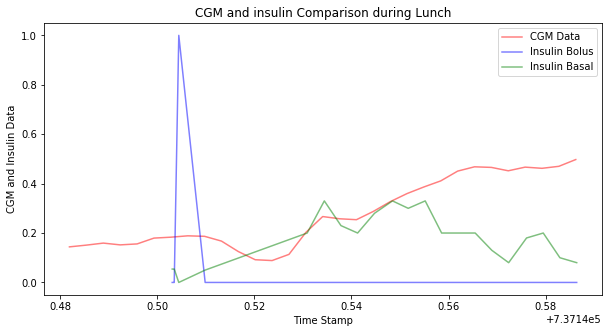

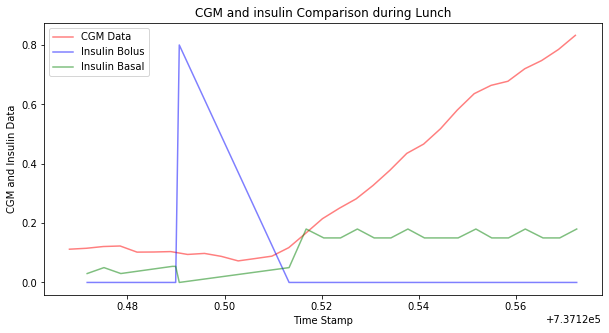

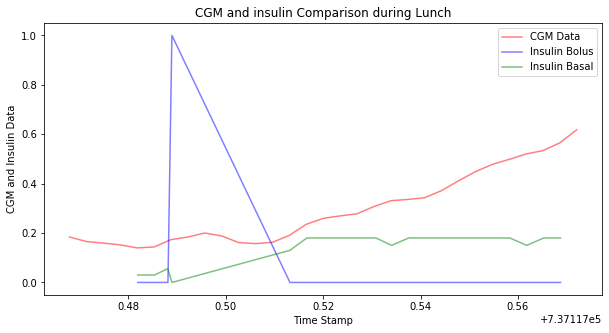

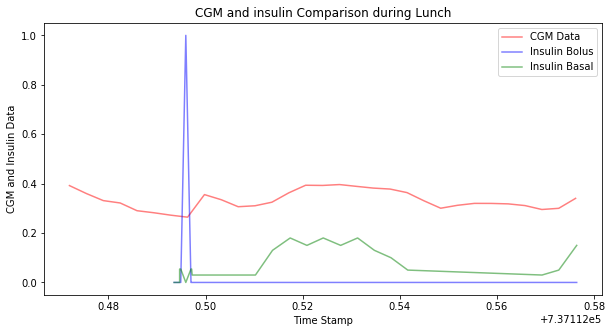

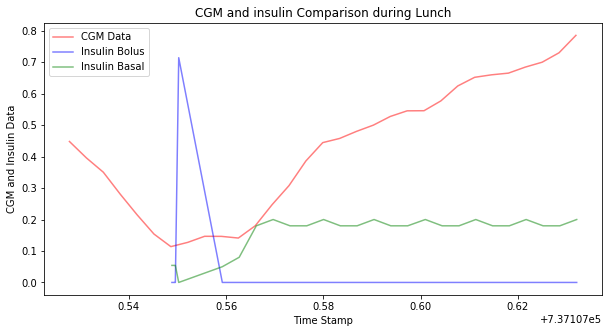

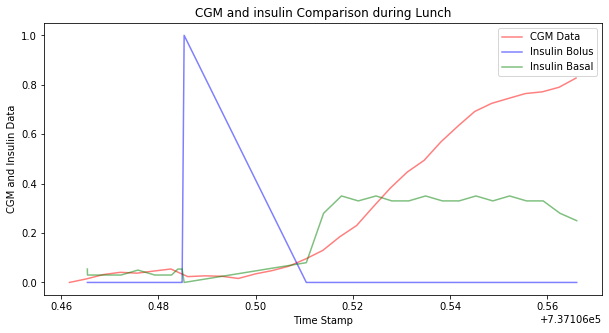

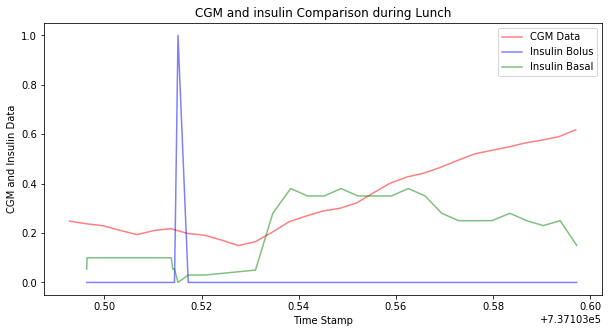

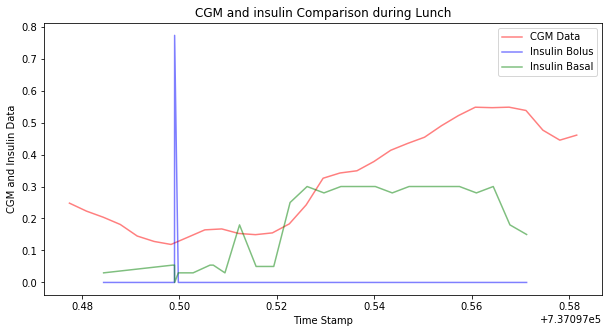

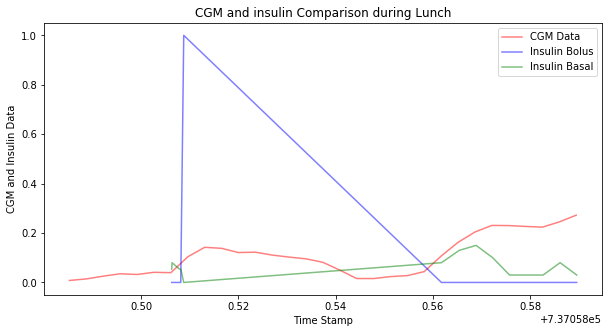

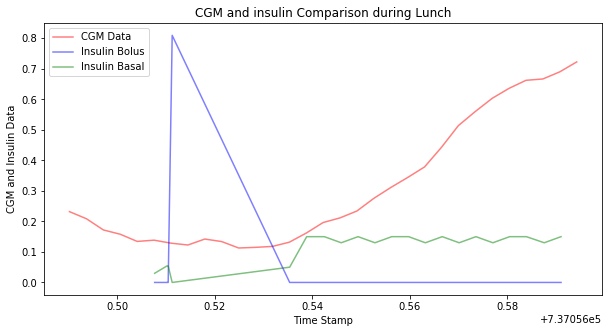

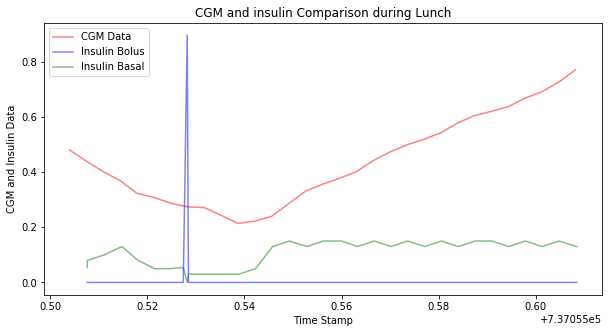

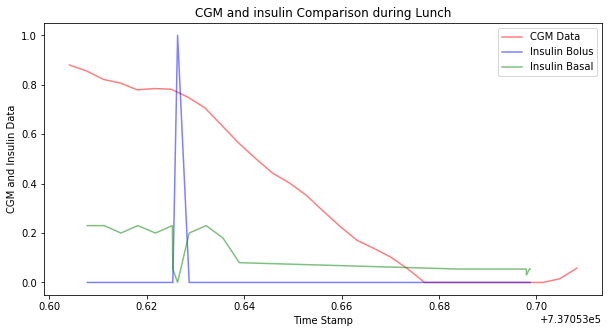

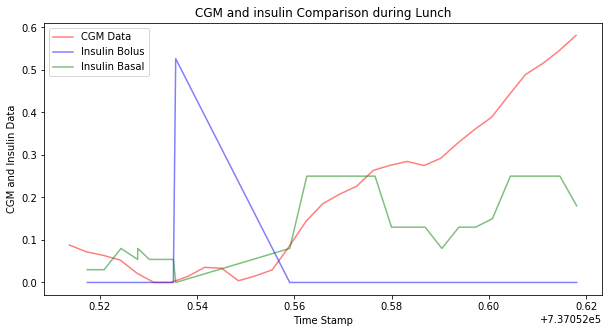

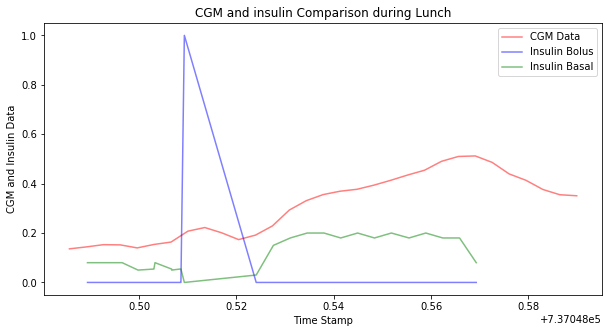

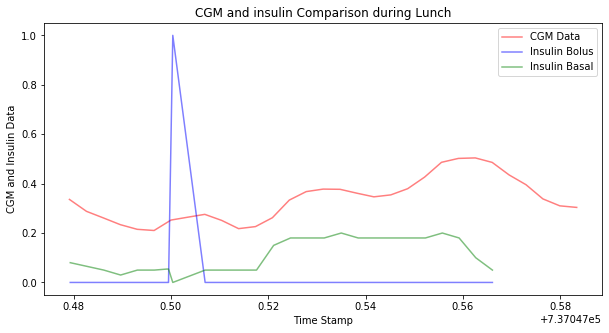

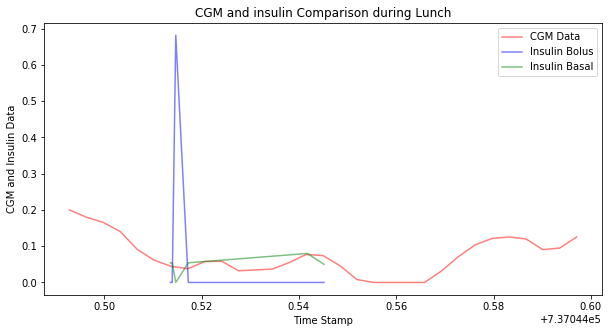

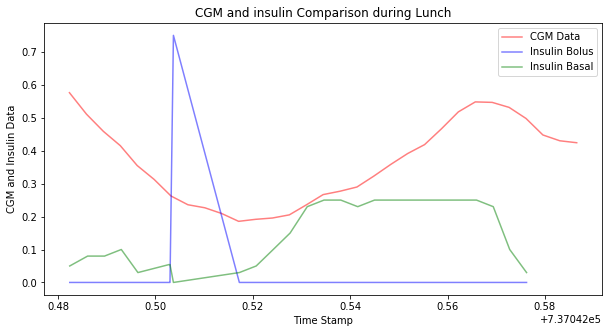

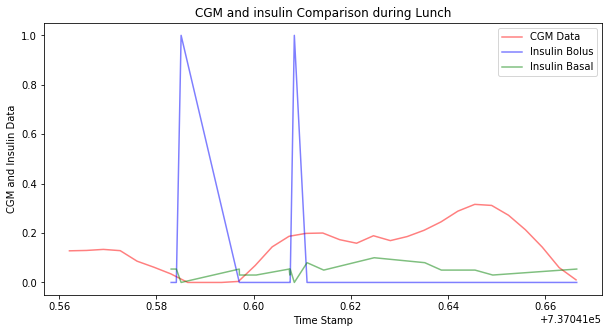

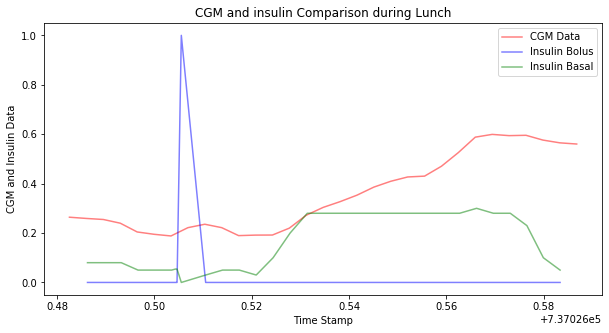

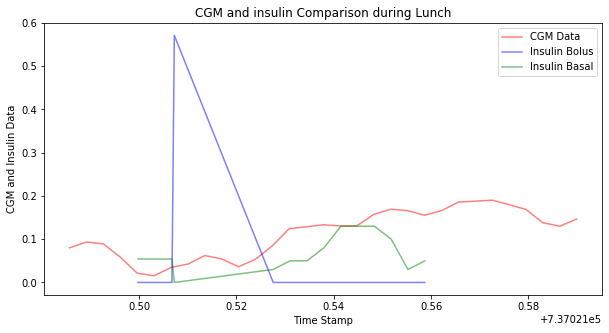

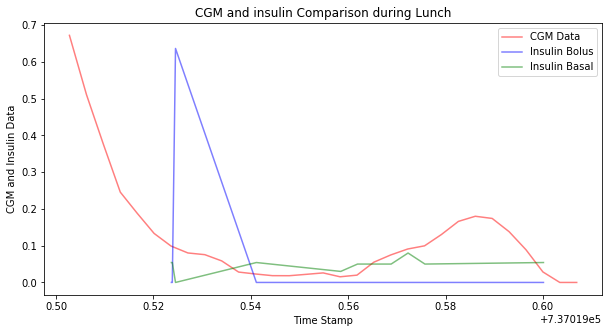

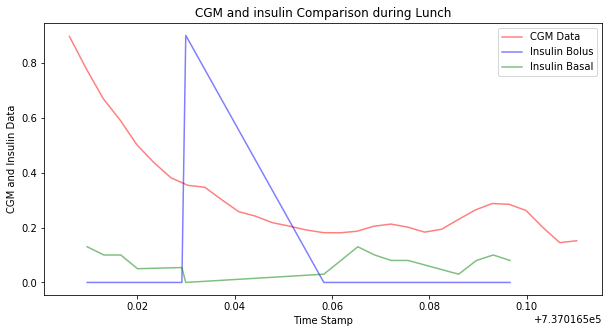

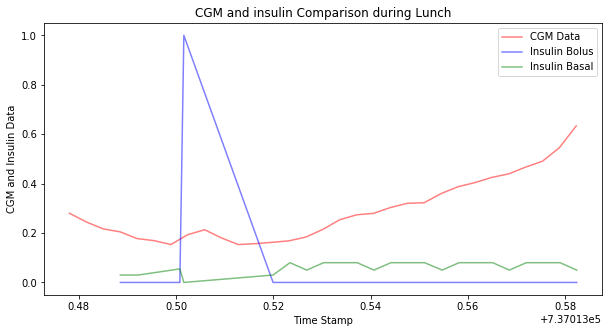

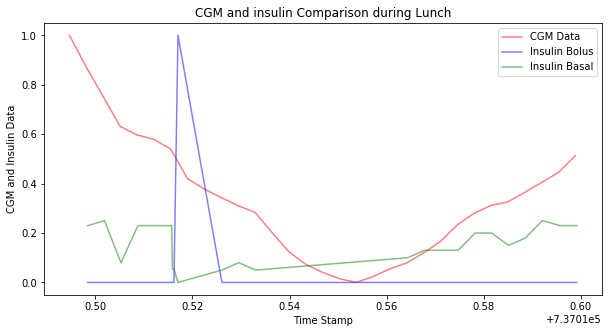

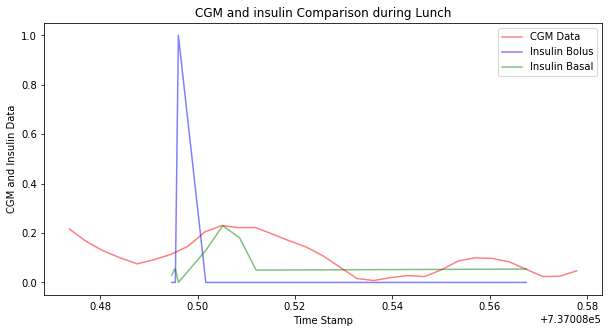

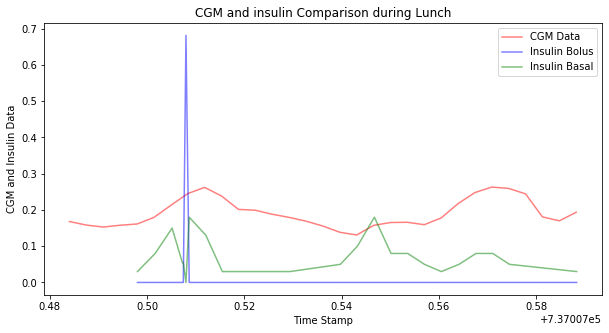

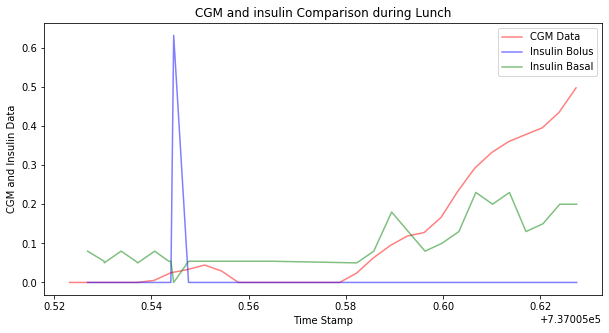

In [94]:
#Plot for CGM Data with insulin over time for Patient 1

for i in range(len(CGMSeriesLunchPat1Scaled)):
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(CGMDateNumLunchPat1.iloc[i], CGMSeriesLunchPat1Scaled[i], c='r', alpha=0.5, label = 'CGM Data')
    plt.plot(InsulinDatenumLunchPat1.iloc[i], InsulinBolusLunchPat1Scaled[i], c='b', alpha=0.5, label = 'Insulin Bolus')
    plt.plot(InsulinDatenumLunchPat1.iloc[i], InsulinBasalLunchPat1.iloc[i], c='g', alpha=0.5, label = 'Insulin Basal')
    plt.legend()
    plt.show()

In [ ]:
#Plot for CGM Data with insulin over time for Patient 2

for i in range(len(CGMSeriesLunchPat2Scaled)):
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(CGMDateNumLunchPat2.iloc[i], CGMSeriesLunchPat2Scaled[i], c='r', alpha=0.5, label = 'CGM Data')
    plt.plot(InsulinDatenumLunchPat2.iloc[i], InsulinBolusLunchPat2Scaled[i], c='b', alpha=0.5, label = 'Insulin Bolus')
    plt.plot(InsulinDatenumLunchPat2.iloc[i], InsulinBasalLunchPat2.iloc[i], c='g', alpha=0.5, label = 'Insulin Basal')
    plt.legend()
    plt.show()

In [ ]:
#Plot for CGM Data with insulin over time for Patient 3

for i in range(len(CGMSeriesLunchPat3Scaled)):
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(CGMDateNumLunchPat3.iloc[i], CGMSeriesLunchPat3Scaled[i], c='r', alpha=0.5, label = 'CGM Data')
    plt.plot(InsulinDatenumLunchPat3.iloc[i], InsulinBolusLunchPat3Scaled[i], c='b', alpha=0.5, label = 'Insulin Bolus')
    plt.plot(InsulinDatenumLunchPat3.iloc[i], InsulinBasalLunchPat3.iloc[i], c='g', alpha=0.5, label = 'Insulin Basal')
    plt.legend()
    plt.show()

In [ ]:
#Plot for CGM Data with insulin over time for Patient 4

for i in range(len(CGMSeriesLunchPat4Scaled)):
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(CGMDateNumLunchPat4.iloc[i], CGMSeriesLunchPat4Scaled[i], c='r', alpha=0.5, label = 'CGM Data')
    plt.plot(InsulinDatenumLunchPat4.iloc[i], InsulinBolusLunchPat4Scaled[i], c='b', alpha=0.5, label = 'Insulin Bolus')
    plt.plot(InsulinDatenumLunchPat4.iloc[i], InsulinBasalLunchPat4.iloc[i], c='g', alpha=0.5, label = 'Insulin Basal')
    plt.legend()
    plt.show()

In [ ]:
#Plot for CGM Data with insulin over time for Patient 5

for i in range(len(CGMSeriesLunchPat5Scaled)):
    plt.figure(figsize=(10,5))
    plt.xlabel("Time Stamp")
    plt.ylabel("CGM and Insulin Data")
    plt.title("CGM and insulin Comparison during Lunch")
    plt.plot(CGMDateNumLunchPat5.iloc[i], CGMSeriesLunchPat5Scaled[i], c='r', alpha=0.5, label = 'CGM Data')
    plt.plot(InsulinDatenumLunchPat5.iloc[i], InsulinBolusLunchPat5Scaled[i], c='b', alpha=0.5, label = 'Insulin Bolus')
    plt.plot(InsulinDatenumLunchPat5.iloc[i], InsulinBasalLunchPat5.iloc[i], c='g', alpha=0.5, label = 'Insulin Basal')
    plt.legend()
    plt.show()

In [95]:
#Feature FFT Calculation
top_fft_features = []
auc_features = [0,0,0,0,0]
df_list = [CGMSeriesLunchPat1Scaled, CGMSeriesLunchPat2Scaled, CGMSeriesLunchPat3Scaled, CGMSeriesLunchPat4Scaled, CGMSeriesLunchPat5Scaled]
df_dateNum_list = [CGMDateNumLunchPat1, CGMDateNumLunchPat2, CGMDateNumLunchPat3, CGMDateNumLunchPat4, CGMDateNumLunchPat5]
i = 0
for df,df_datenum in zip(df_list,df_dateNum_list):
    if len(top_fft_features) == 0:
        top_fft_features = np.abs(np.fft.fft(np.flip(df)))
    else:
        top_fft_features = np.concatenate((top_fft_features, np.abs(np.fft.fft(np.flip(df)))))

#top_fft_features[:,1:9].shape

In [96]:
# Visualize fft for sample patients
#for i in [30,45,60,75,90,105,120,135,150,165,180]:
#    plt.suptitle("Feature matrix row : "+str(i))
#    plt.ylabel("Abs frequency value")
#    plt.plot(top_fft_features[i])
#    plt.show()

In [97]:
#DWT Feature Calculation

def calc_feature_dwt(df):
    cA, cB = pywt.dwt(df, 'haar')
    cA_threshold = pywt.threshold(cA, np.std(cA)/2, mode='soft')
    cB_threshold = pywt.threshold(cB, np.std(cB)/2, mode='soft')
 
    
    reconstructed_signal = pywt.idwt(cA_threshold, cB_threshold, 'haar')

    #for i in range(len(df)):
    #    plt.subplot(212)
    #    plt.plot(df[i], 'o')
    #    plt.plot(reconstructed_signal[i], 'g')
    #    plt.legend(['given signal', 'reconstructed signal'])
    #    plt.show()

    feature_dwt_top8 = cA[:,:-8] #sorted in Ascending

    return feature_dwt_top8

# calc_feature_dwt(CGMSeriesLunchPat2Scaled)

df_list = [CGMSeriesLunchPat1Scaled, CGMSeriesLunchPat2Scaled, CGMSeriesLunchPat3Scaled, CGMSeriesLunchPat4Scaled, CGMSeriesLunchPat5Scaled]
top_dwt_features = []
for df in df_list:
    if len(top_dwt_features) == 0:
        top_dwt_features = calc_feature_dwt(df)
    else:
        top_dwt_features = np.concatenate((top_dwt_features, calc_feature_dwt(df)))
        
#top_dwt_features[:,1:7].shape

In [171]:
# Coeffecient of Variation Feature Calculation
feature_COV = []
for i in range(len(CGMSeriesLunchPat1Scaled)):
    feature_COV.append(np.mean(CGMSeriesLunchPat1Scaled[i]) / np.std(CGMSeriesLunchPat1Scaled[i]))
    
for i in range(len(CGMSeriesLunchPat2Scaled)):
    feature_COV.append(np.mean(CGMSeriesLunchPat2Scaled[i]) / np.std(CGMSeriesLunchPat2Scaled[i]))

for i in range(len(CGMSeriesLunchPat3Scaled)):
    feature_COV.append(np.mean(CGMSeriesLunchPat3Scaled[i]) / np.std(CGMSeriesLunchPat3Scaled[i]))
    
for i in range(len(CGMSeriesLunchPat4Scaled)):
    feature_COV.append(np.mean(CGMSeriesLunchPat4Scaled[i]) / np.std(CGMSeriesLunchPat4Scaled[i]))
    
for i in range(len(CGMSeriesLunchPat5Scaled)):
    feature_COV.append(np.mean(CGMSeriesLunchPat5Scaled[i]) / np.std(CGMSeriesLunchPat5Scaled[i]))

feature_COV_ = np.asarray(feature_COV)

feature_COV_WO_nan = feature_COV_[np.isnan(feature_COV_) == False]
feature_COV_WO_nan.sort()
mean_with_threshold = np.mean(feature_COV_WO_nan[0:len(feature_COV_WO_nan)-1])
mean_with_threshold

# feature_COV_.replace(np.nan,mean_with_threshold)
feature_COV_[feature_COV_ > 200] = mean_with_threshold
for x in range(len(feature_COV_)):
    if np.isnan(feature_COV_[x]):
        feature_COV_[x] = mean_with_threshold
# type(feature_COV_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


numpy.ndarray

In [99]:
#Velocity w.r.t Acc Feature Calculation
velocity = []
FinalMaxPoint=[]

#For Patient 1
for j in range(len(CGMSeriesLunchPat1Scaled)):
    for i in range(0,30):
        velocity.append((CGMSeriesLunchPat1Scaled[j][i+1]-CGMSeriesLunchPat1Scaled[j][i])/(CGMDateNumLunchPat1.iloc[j][i+1]-CGMDateNumLunchPat1.iloc[j][i]))
    velocity.append(0)
    #print(velocity)
    #plt.figure(figsize=(10,5))
    #plt.xlabel("Time Stamp")
    #plt.ylabel("CGM and Insulin Data")
    #plt.title("CGM and insulin Comparison during Lunch")
    #plt.plot(CGMDateNumLunchPat1.iloc[j],velocity, c='r', alpha=0.5)
    #plt.show()
    #As Timestamp in the file is in Decending Order, our graph Starts the differential function from the end . Hence, we reverse our List.

    velocity.reverse()
    MaxPointIndex=[]
    MaxPoint=[]
    LunchPoints=[]
    finalLunchPoints=[]

    for k in range(len(velocity)-1):
        if velocity[k] > 0 and velocity[k+1] < 0:
            MaxPointIndex.append(k)      #point where he is done eating

    for l in range(len(MaxPointIndex)):
        MaxPoint.append(CGMSeriesLunchPat1Scaled[j][MaxPointIndex[l]]) #append corresponding CGM data.

    if len(MaxPoint) == 0:
        peak = 1
        finalLunchPoints.append(1) #Max Lunch Point
        finalLunchPoints.append(1) # Min lunch point in case MaxPoint list is empty
    else:
        peak=max(MaxPoint)
        
        for i in range(len(MaxPoint)):
            #peak=max(MaxPoint)
            if MaxPoint[i] >= peak-0.0714 and MaxPoint[i] <= peak:
                LunchPoints.append(MaxPoint[i])
                
        maxLunchPoints=max(LunchPoints)
        minLunchPoints=min(LunchPoints)
        finalLunchPoints.append(minLunchPoints)
        finalLunchPoints.append(maxLunchPoints)
    
    velocity = []
    FinalMaxPoint.append(finalLunchPoints)
    
    
#For Patient 2    
for j in range(len(CGMSeriesLunchPat2Scaled)):
    for i in range(0,30):
        velocity.append((CGMSeriesLunchPat2Scaled[j][i+1]-CGMSeriesLunchPat2Scaled[j][i])/(CGMDateNumLunchPat2.iloc[j][i+1]-CGMDateNumLunchPat2.iloc[j][i]))
    velocity.append(0)
    #print(velocity)
    #plt.figure(figsize=(10,5))
    #plt.xlabel("Time Stamp")
    #plt.ylabel("CGM and Insulin Data")
    #plt.title("CGM and insulin Comparison during Lunch")
    #plt.plot(CGMDateNumLunchPat1.iloc[j],velocity, c='r', alpha=0.5)
    #plt.show()
    #As Timestamp in the file is in Decending Order, our graph Starts the differential function from the end . Hence, we reverse our List.

    velocity.reverse()
    MaxPointIndex=[]
    MaxPoint=[]
    LunchPoints=[]
    finalLunchPoints=[]

    for k in range(len(velocity)-1):
        if velocity[k] > 0 and velocity[k+1] < 0:
            MaxPointIndex.append(k)      #point where he is done eating

    for l in range(len(MaxPointIndex)):
        MaxPoint.append(CGMSeriesLunchPat2Scaled[j][MaxPointIndex[l]]) #append corresponding CGM data.

    if len(MaxPoint) == 0:
        peak = 1
        finalLunchPoints.append(1) #Max Lunch Point
        finalLunchPoints.append(1) # Min lunch point in case MaxPoint list is empty
    else:
        peak=max(MaxPoint)
        
        for i in range(len(MaxPoint)):
            #peak=max(MaxPoint)
            if MaxPoint[i] >= peak-0.0714 and MaxPoint[i] <= peak:
                LunchPoints.append(MaxPoint[i])
                
        maxLunchPoints=max(LunchPoints)
        minLunchPoints=min(LunchPoints)
        finalLunchPoints.append(minLunchPoints)
        finalLunchPoints.append(maxLunchPoints)
    
    velocity = []
    FinalMaxPoint.append(finalLunchPoints)
    

#For Patient 3    
for j in range(len(CGMSeriesLunchPat3Scaled)):
    for i in range(0,30):
        velocity.append((CGMSeriesLunchPat3Scaled[j][i+1]-CGMSeriesLunchPat3Scaled[j][i])/(CGMDateNumLunchPat3.iloc[j][i+1]-CGMDateNumLunchPat3.iloc[j][i]))
    velocity.append(0)
    #print(velocity)
    #plt.figure(figsize=(10,5))
    #plt.xlabel("Time Stamp")
    #plt.ylabel("CGM and Insulin Data")
    #plt.title("CGM and insulin Comparison during Lunch")
    #plt.plot(CGMDateNumLunchPat1.iloc[j],velocity, c='r', alpha=0.5)
    #plt.show()
    #As Timestamp in the file is in Decending Order, our graph Starts the differential function from the end . Hence, we reverse our List.

    velocity.reverse()
    MaxPointIndex=[]
    MaxPoint=[]
    LunchPoints=[]
    finalLunchPoints=[]

    for k in range(len(velocity)-1):
        if velocity[k] > 0 and velocity[k+1] < 0:
            MaxPointIndex.append(k)      #point where he is done eating

    for l in range(len(MaxPointIndex)):
        MaxPoint.append(CGMSeriesLunchPat3Scaled[j][MaxPointIndex[l]]) #append corresponding CGM data.

    if len(MaxPoint) == 0:
        peak = 1
        finalLunchPoints.append(1) #Max Lunch Point
        finalLunchPoints.append(1) # Min lunch point in case MaxPoint list is empty
    else:
        peak=max(MaxPoint)
        
        for i in range(len(MaxPoint)):
            #peak=max(MaxPoint)
            if MaxPoint[i] >= peak-0.0714 and MaxPoint[i] <= peak:
                LunchPoints.append(MaxPoint[i])
                
        maxLunchPoints=max(LunchPoints)
        minLunchPoints=min(LunchPoints)
        finalLunchPoints.append(minLunchPoints)
        finalLunchPoints.append(maxLunchPoints)
    
    velocity = []
    FinalMaxPoint.append(finalLunchPoints)

    
#For Patient 4
for j in range(len(CGMSeriesLunchPat4Scaled)):
    for i in range(0,30):
        velocity.append((CGMSeriesLunchPat4Scaled[j][i+1]-CGMSeriesLunchPat4Scaled[j][i])/(CGMDateNumLunchPat4.iloc[j][i+1]-CGMDateNumLunchPat4.iloc[j][i]))
    velocity.append(0)
    #print(velocity)
    #plt.figure(figsize=(10,5))
    #plt.xlabel("Time Stamp")
    #plt.ylabel("CGM and Insulin Data")
    #plt.title("CGM and insulin Comparison during Lunch")
    #plt.plot(CGMDateNumLunchPat1.iloc[j],velocity, c='r', alpha=0.5)
    #plt.show()
    #As Timestamp in the file is in Decending Order, our graph Starts the differential function from the end . Hence, we reverse our List.

    velocity.reverse()
    MaxPointIndex=[]
    MaxPoint=[]
    LunchPoints=[]
    finalLunchPoints=[]

    for k in range(len(velocity)-1):
        if velocity[k] > 0 and velocity[k+1] < 0:
            MaxPointIndex.append(k)      #point where he is done eating

    for l in range(len(MaxPointIndex)):
        MaxPoint.append(CGMSeriesLunchPat4Scaled[j][MaxPointIndex[l]]) #append corresponding CGM data.

    if len(MaxPoint) == 0:
        peak = 1
        finalLunchPoints.append(1) #Max Lunch Point
        finalLunchPoints.append(1) # Min lunch point in case MaxPoint list is empty
    else:
        peak=max(MaxPoint)
        
        for i in range(len(MaxPoint)):
            #peak=max(MaxPoint)
            if MaxPoint[i] >= peak-0.0714 and MaxPoint[i] <= peak:
                LunchPoints.append(MaxPoint[i])
                
        maxLunchPoints=max(LunchPoints)
        minLunchPoints=min(LunchPoints)
        finalLunchPoints.append(minLunchPoints)
        finalLunchPoints.append(maxLunchPoints)
    
    velocity = []
    FinalMaxPoint.append(finalLunchPoints)
    
    
#For Patient 5
for j in range(len(CGMSeriesLunchPat5Scaled)):
    for i in range(0,30):
        velocity.append((CGMSeriesLunchPat5Scaled[j][i+1]-CGMSeriesLunchPat5Scaled[j][i])/(CGMDateNumLunchPat5.iloc[j][i+1]-CGMDateNumLunchPat3.iloc[j][i]))
    velocity.append(0)
    #print(velocity)
    #plt.figure(figsize=(10,5))
    #plt.xlabel("Time Stamp")
    #plt.ylabel("CGM and Insulin Data")
    #plt.title("CGM and insulin Comparison during Lunch")
    #plt.plot(CGMDateNumLunchPat1.iloc[j],velocity, c='r', alpha=0.5)
    #plt.show()
    #As Timestamp in the file is in Decending Order, our graph Starts the differential function from the end . Hence, we reverse our List.

    velocity.reverse()
    MaxPointIndex=[]
    MaxPoint=[]
    LunchPoints=[]
    finalLunchPoints=[]

    for k in range(len(velocity)-1):
        if velocity[k] > 0 and velocity[k+1] < 0:
            MaxPointIndex.append(k)      #point where he is done eating

    for l in range(len(MaxPointIndex)):
        MaxPoint.append(CGMSeriesLunchPat3Scaled[j][MaxPointIndex[l]]) #append corresponding CGM data.

    if len(MaxPoint) == 0:
        peak = 1
        finalLunchPoints.append(1) #Max Lunch Point
        finalLunchPoints.append(1) # Min lunch point in case MaxPoint list is empty
    else:
        peak=max(MaxPoint)
        
        for i in range(len(MaxPoint)):
            #peak=max(MaxPoint)
            if MaxPoint[i] >= peak-0.0714 and MaxPoint[i] <= peak:
                LunchPoints.append(MaxPoint[i])
                
        maxLunchPoints=max(LunchPoints)
        minLunchPoints=min(LunchPoints)
        finalLunchPoints.append(minLunchPoints)
        finalLunchPoints.append(maxLunchPoints)
    
    velocity = []
    FinalMaxPoint.append(finalLunchPoints)
    
FinalMaxPoint_ = np.asarray(FinalMaxPoint)
#FinalMaxPoint_.shape

In [173]:
#Windowed Entropy Feature 
output_entropy = []

y = []
ordered_cgm = []
df_list = [CGMSeriesLunchPat1, CGMSeriesLunchPat2, CGMSeriesLunchPat3, CGMSeriesLunchPat4, CGMSeriesLunchPat5]
for df in df_list:
    for j in range(len(df)):
        for i in range(1):
            temp = []
            temp1 = []
            c = df.iloc[j]
            if df.isnull().iloc[j,i] == False:
                y.append(c[i])
            for m in range(len(c)-1,-1,-1):
                temp.append(c[m])
            y_array = np.array(temp)
            ordered_cgm.append(y_array)
        
for i in range(len(ordered_cgm)):
    entropy_arr = []
    #print(np.asarray(ordered_cgm)[i][1:])
    for j in range(1, 30, 5):
        s = scipy.stats.entropy(np.asarray(ordered_cgm)[i, j:j+5])
        #print(s)
        entropy_arr.append(s)
    output_entropy.append(np.amin(np.asarray(entropy_arr)))
    #print(entropy_arr)    
    #plt.plot(entropy_arr)
    #plt.xlabel('Window')
    #plt.ylabel('Approx Entropy Value')
    #plt.show()

output_entropy = np.asarray(output_entropy)
output_entropy.shape

(186,)

In [209]:
CGMDateNumLunchPat1Mapped = CGMDateNumLunchPat1[CGMDateNumLunchPat1.index.isin(CGMSeriesLunchPat1.index)]
CGMDateNumLunchPat2Mapped = CGMDateNumLunchPat2[CGMDateNumLunchPat2.index.isin(CGMSeriesLunchPat2.index)]
CGMDateNumLunchPat3Mapped = CGMDateNumLunchPat3[CGMDateNumLunchPat3.index.isin(CGMSeriesLunchPat3.index)]
CGMDateNumLunchPat4Mapped = CGMDateNumLunchPat4[CGMDateNumLunchPat4.index.isin(CGMSeriesLunchPat4.index)]
CGMDateNumLunchPat5Mapped = CGMDateNumLunchPat5[CGMDateNumLunchPat5.index.isin(CGMSeriesLunchPat5.index)]

#Validate Dafaframes shape
print(CGMSeriesLunchPat1.shape == CGMDateNumLunchPat1Mapped.shape)
print(CGMSeriesLunchPat2.shape == CGMDateNumLunchPat2Mapped.shape)
print(CGMSeriesLunchPat3.shape == CGMDateNumLunchPat3Mapped.shape)
print(CGMSeriesLunchPat4.shape == CGMDateNumLunchPat4Mapped.shape)
print(CGMSeriesLunchPat5.shape == CGMDateNumLunchPat5Mapped.shape)

df_list = [CGMSeriesLunchPat1Scaled, CGMSeriesLunchPat2Scaled, CGMSeriesLunchPat3Scaled, 
           CGMSeriesLunchPat4Scaled, CGMSeriesLunchPat5Scaled]
df_dateNum_list = [CGMDateNumLunchPat1Mapped, CGMDateNumLunchPat2Mapped, CGMDateNumLunchPat3Mapped, 
                   CGMDateNumLunchPat4Mapped, CGMDateNumLunchPat5Mapped]
feature_auc = []

for df, df_datenum in zip(df_list, df_dateNum_list):
    for x in simps(df[:,::-1], df_datenum[df_datenum.columns[::-1]]):
        feature_auc.append(x)


feature_auc = np.asarray(feature_auc)
feature_auc.shape

True
True
True
True
True


(186,)

In [226]:
import seaborn as sns

lognorm_mean_list = []
lognorm_std_list = []
df_list = [CGMSeriesLunchPat1Scaled, CGMSeriesLunchPat2Scaled, CGMSeriesLunchPat3Scaled, 
           CGMSeriesLunchPat4Scaled, CGMSeriesLunchPat5Scaled]

# Preprocessing for distribution value to lie in between x and inf
for df in df_list:
    for i in range(len(df)):
        if np.isnan(df[i][30]):
            df[i][30] = df[i][29] + (df[i][28] - df[i][29])
            
for df in df_list:
    for i in range(len(df)):
        x = df[i]
        x[x == 0] = np.mean(x)
        mu = np.mean(x) 
        sigma = np.std(x)

        x_exp = x
        mu_exp = np.exp(mu)
        sigma_exp = np.exp(sigma)

        fitting_params_lognormal = scipy.stats.lognorm.fit(x_exp, floc=0, scale=mu_exp)
        lognorm_dist_fitted = scipy.stats.lognorm(*fitting_params_lognormal)
        t = np.linspace(np.min(x_exp), np.max(x_exp), 100)

        lognorm_dist = scipy.stats.lognorm(s=sigma, loc=0, scale=np.exp(mu))
        lognorm_mean_list.append(lognorm_dist.mean())
        lognorm_std_list.append(lognorm_dist.std())


        # Plot lognormals
        f, ax = plt.subplots(1, sharex='col', figsize=(5, 5))
        sns.distplot(x_exp, ax=ax, norm_hist=True, kde=False,
                     label='Data exp(X)~N(mu={0:.1f}, sigma={1:.1f})\n X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma))
        ax.plot(t, lognorm_dist_fitted.pdf(t), lw=2, color='b',
                label='Fitted Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist_fitted.mean(), lognorm_dist_fitted.std()))
        ax.plot(t, lognorm_dist.pdf(t), lw=12, color='b', ls=':',
                label='Original Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist.mean(), lognorm_dist.std()))
        ax.legend(loc='best')
        plt.show()

lognorm_std_list = np.asarray(lognorm_std_list)
lognorm_mean_list = np.asarray(lognorm_mean_list)

(33, 33)

In [475]:
#Creating the feature Matrix

Feature_Matrix = np.hstack((top_fft_features[:,1:9], top_dwt_features[:,1:7], FinalMaxPoint_, 
                            feature_COV_[:,None], output_entropy[:, None], feature_auc[:, None], 
                            lognorm_mean_list[:,None], lognorm_std_list[:,None]))
Feature_Matrix.shape

(186, 21)

In [476]:
Scaled_Feature_Matrix = scaler.fit_transform(Feature_Matrix)
New_Scaled_Feature_Matrix = np.nan_to_num(Scaled_Feature_Matrix)

Scaled_Feature_Matrix_ = np.asmatrix(New_Scaled_Feature_Matrix)

In [477]:
pca = PCA(n_components=5)
reduced_matrix = pca.fit_transform(New_Scaled_Feature_Matrix)
reduced_matrix

array([[ 8.35303398e-01,  1.03790517e-01,  2.84614490e-01,
        -1.14141280e-01,  4.61651538e-01],
       [ 1.27053674e+00, -1.14894072e+00, -2.80294141e-02,
         2.01409435e-01, -3.16661273e-01],
       [ 6.92508369e-01, -4.56727920e-01, -5.22086507e-02,
         4.22463522e-02,  2.88940385e-01],
       [ 5.76165766e-01,  5.30101646e-01,  1.87439004e-01,
        -1.72163773e-02,  3.18613564e-01],
       [-3.77602647e-01,  3.17528273e-01, -2.27308271e-01,
         2.03463520e-01, -3.51660110e-01],
       [ 8.43648330e-01,  9.18657388e-01,  1.15390405e-01,
        -1.14380509e-01,  1.71592421e-01],
       [ 2.97551879e-01,  1.00767819e+00, -1.30191636e-02,
        -7.77367683e-02,  5.43130044e-02],
       [ 7.46782822e-02, -5.49023511e-01,  7.30254625e-02,
        -1.20578456e-01,  4.56396379e-01],
       [-2.00557130e-01,  9.32722675e-02, -1.46459555e-01,
         9.40177466e-02,  1.48170190e-01],
       [-4.03902792e-01, -8.75987085e-02, -1.04017579e-01,
         2.79538755e-01

In [478]:
pca.components_

array([[ 0.13887042,  0.13643453,  0.15646045,  0.18683274,  0.18083623,
         0.1615726 ,  0.1387813 ,  0.15855133,  0.31666962,  0.30836088,
         0.31234321,  0.32643202,  0.31423901,  0.27885182,  0.23978777,
         0.23761878,  0.02138566,  0.01533853,  0.13984056,  0.22545362,
         0.1961712 ],
       [ 0.26433548,  0.2758083 ,  0.28895844,  0.33939954,  0.34438203,
         0.38058274,  0.2843257 ,  0.31369206, -0.13215165, -0.13508956,
        -0.13524429, -0.13893404, -0.1579573 , -0.16605922, -0.16021333,
        -0.15828157, -0.08009696, -0.0113324 , -0.1254017 , -0.10845513,
        -0.04577078],
       [ 0.07645719, -0.01562486,  0.02946181,  0.00985953, -0.03710433,
         0.05956096,  0.02066575,  0.01340132, -0.30503401, -0.31008909,
        -0.26113393, -0.16898335, -0.07596206,  0.02119115,  0.57047875,
         0.54451639, -0.09247191, -0.13875197,  0.11953047,  0.05456886,
         0.16803243],
       [ 0.28229366,  0.03055416,  0.17988394,  0.09498509

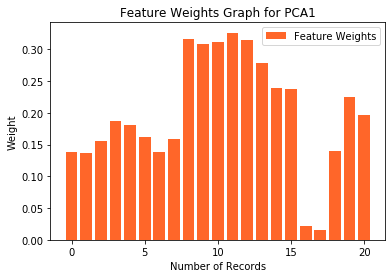

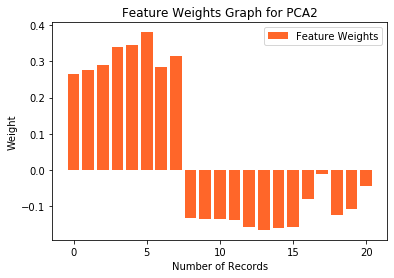

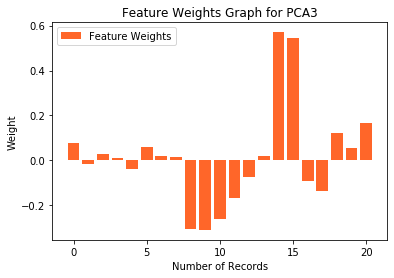

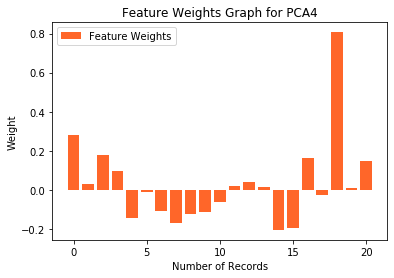

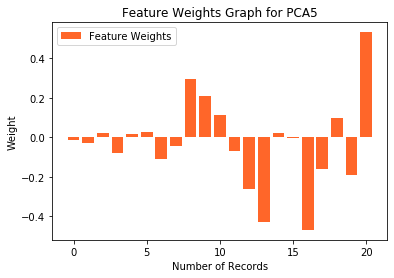

In [479]:
# Picking Best 5 features from PCA based on their weights
x_axis = np.arange(len(pca.components_[0]))
width = 0.30

for i in range(0,5):
    plt.title("Feature Weights Graph for PCA"+str(i+1))
    plt.bar(x_axis,pca.components_[i], color='#ff6629', label = 'Feature Weights')
    plt.xlabel('Number of Records')
    plt.ylabel('Weight')
    plt.legend()
    plt.show()


In [480]:
PCA_Variance = pca.explained_variance_ratio_
PCA_Variance

array([0.40192286, 0.33187625, 0.05888244, 0.04227046, 0.0344877 ])

In [481]:
PCA_Var_Sum = np.sum(np.asarray(PCA_Variance))
PCA_Var_Sum

0.8694396995709996

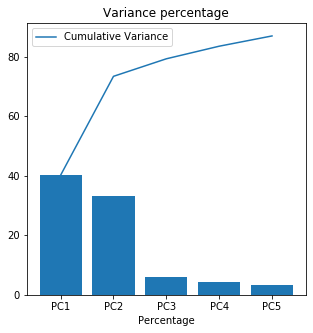

In [482]:
objects = ('PC1', 'PC2', 'PC3', 'PC4', 'PC5')
y_pos = np.arange(len(objects))

PCA_Var_Percent = PCA_Variance * 100

plt.figure(figsize=(5,5))
plt.xlabel("Percentage")
plt.plot(np.cumsum(PCA_Var_Percent), label= 'Cumulative Variance')
plt.bar(y_pos, PCA_Var_Percent)
plt.xticks(y_pos, objects)
plt.title('Variance percentage')
plt.legend()
plt.show()

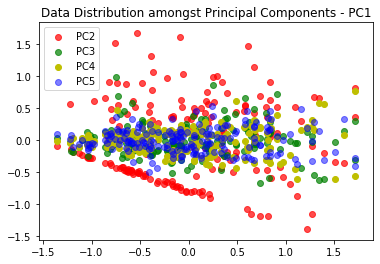

In [483]:
plt.title("Data Distribution amongst Principal Components - PC1")
plt.scatter(reduced_matrix[:,0], reduced_matrix[:,1], c='r', label='PC2', alpha = 0.7)
plt.scatter(reduced_matrix[:,0], reduced_matrix[:,2], c='g', label='PC3', alpha = 0.7)
plt.scatter(reduced_matrix[:,0], reduced_matrix[:,3], c='y', label='PC4')
plt.scatter(reduced_matrix[:,0], reduced_matrix[:,4], c='b', label='PC5', alpha = 0.5)
plt.legend()
plt.show()

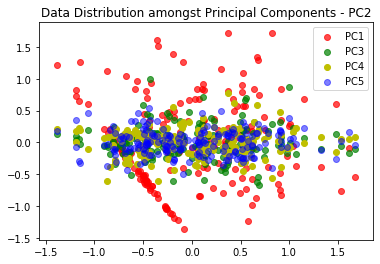

In [484]:
plt.title("Data Distribution amongst Principal Components - PC2")
plt.scatter(reduced_matrix[:,1], reduced_matrix[:,0], c='r', label='PC1', alpha = 0.7)
plt.scatter(reduced_matrix[:,1], reduced_matrix[:,2], c='g', label='PC3', alpha = 0.7)
plt.scatter(reduced_matrix[:,1], reduced_matrix[:,3], c='y', label='PC4')
plt.scatter(reduced_matrix[:,1], reduced_matrix[:,4], c='b', label='PC5', alpha = 0.5)
plt.legend()
plt.show()

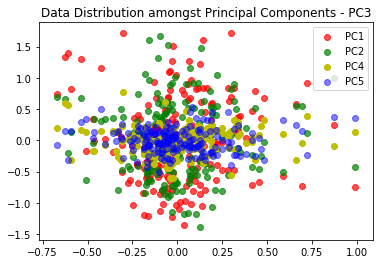

In [485]:
plt.title("Data Distribution amongst Principal Components - PC3")
plt.scatter(reduced_matrix[:,2], reduced_matrix[:,0], c='r', label='PC1', alpha = 0.7)
plt.scatter(reduced_matrix[:,2], reduced_matrix[:,1], c='g', label='PC2', alpha = 0.7)
plt.scatter(reduced_matrix[:,2], reduced_matrix[:,3], c='y', label='PC4')
plt.scatter(reduced_matrix[:,2], reduced_matrix[:,4], c='b', label='PC5', alpha = 0.5)
plt.legend()
plt.show()

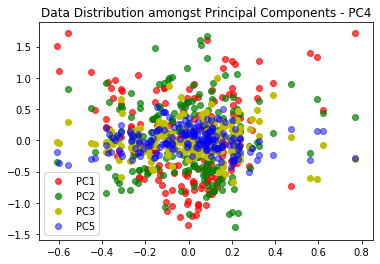

In [486]:
plt.title("Data Distribution amongst Principal Components - PC4")
plt.scatter(reduced_matrix[:,3], reduced_matrix[:,0], c='r', label='PC1', alpha = 0.7)
plt.scatter(reduced_matrix[:,3], reduced_matrix[:,1], c='g', label='PC2', alpha = 0.7)
plt.scatter(reduced_matrix[:,3], reduced_matrix[:,2], c='y', label='PC3')
plt.scatter(reduced_matrix[:,3], reduced_matrix[:,4], c='b', label='PC5', alpha = 0.5)
plt.legend()
plt.show()

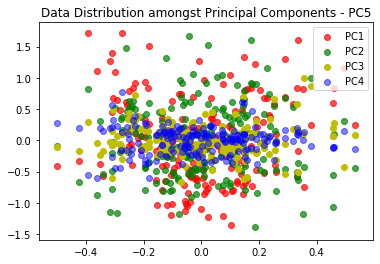

In [487]:
plt.title("Data Distribution amongst Principal Components - PC5")
plt.scatter(reduced_matrix[:,4], reduced_matrix[:,0], c='r', label='PC1', alpha = 0.7)
plt.scatter(reduced_matrix[:,4], reduced_matrix[:,1], c='g', label='PC2', alpha = 0.7)
plt.scatter(reduced_matrix[:,4], reduced_matrix[:,2], c='y', label='PC3')
plt.scatter(reduced_matrix[:,4], reduced_matrix[:,3], c='b', label='PC4', alpha = 0.5)
plt.legend()
plt.show()

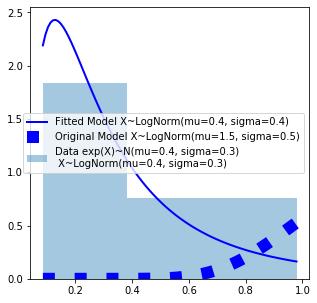

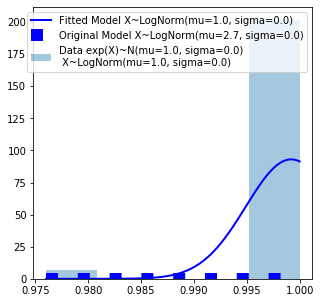

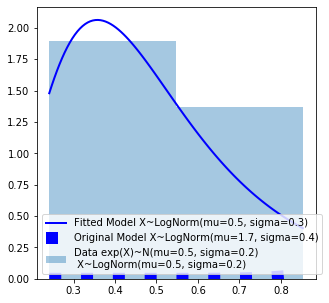

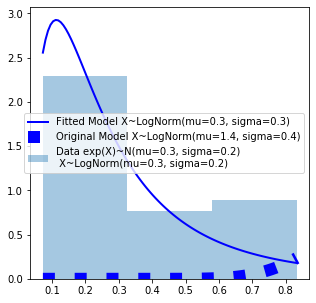

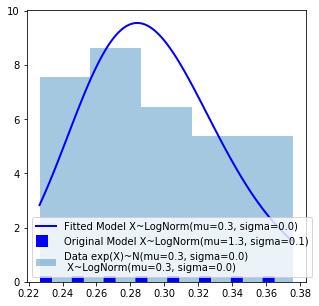

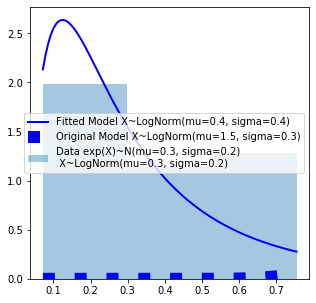

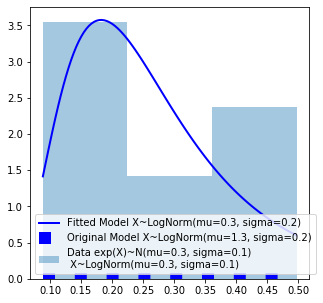

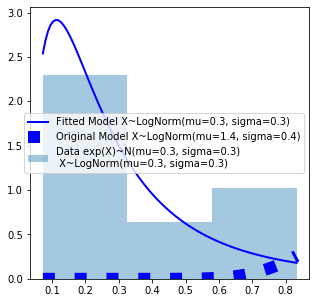

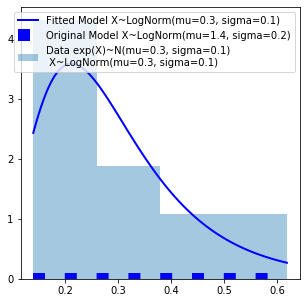

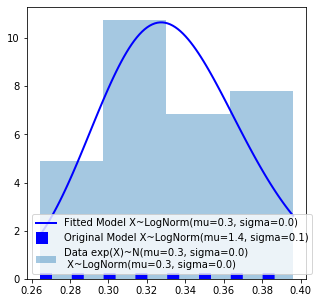

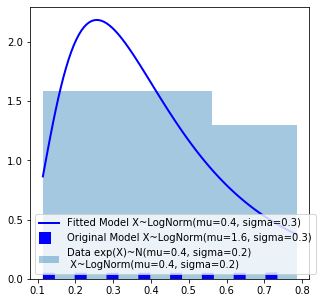

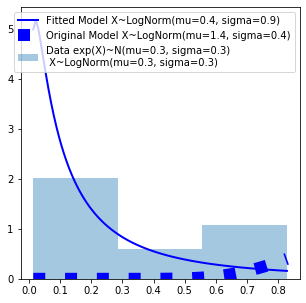

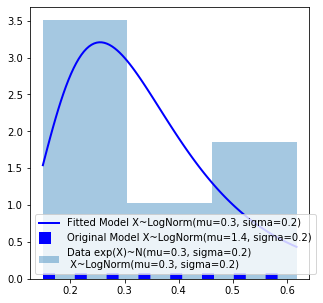

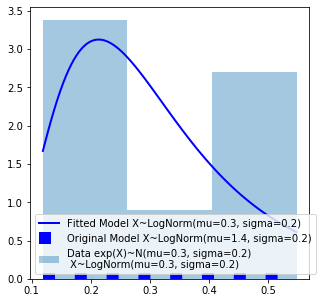

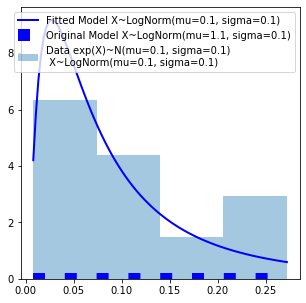

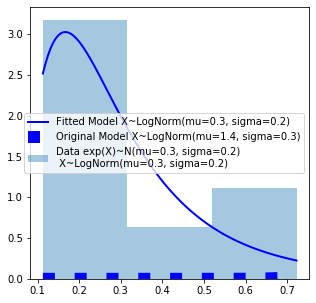

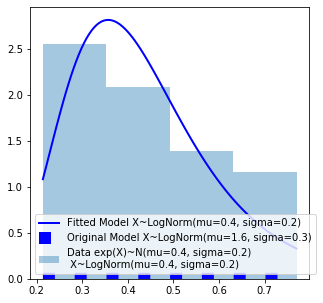

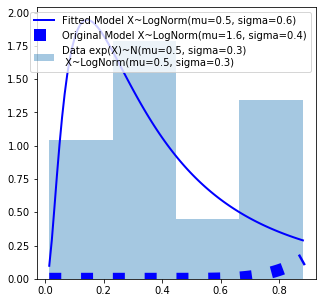

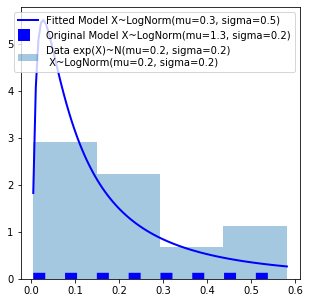

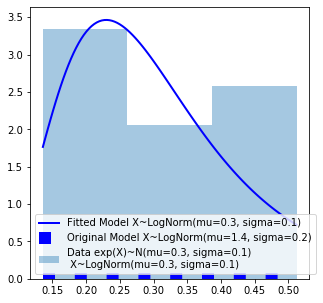

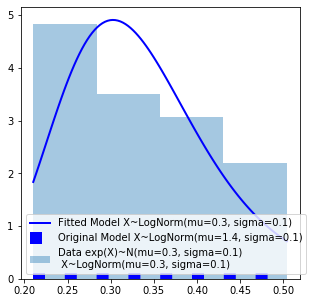

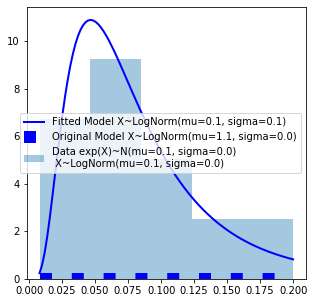

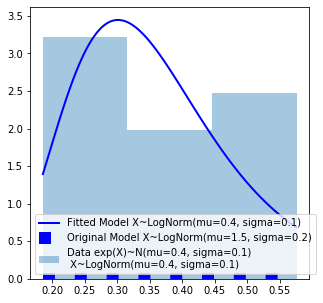

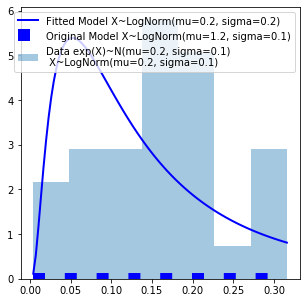

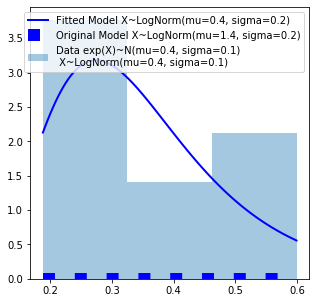

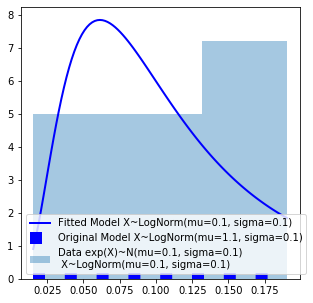

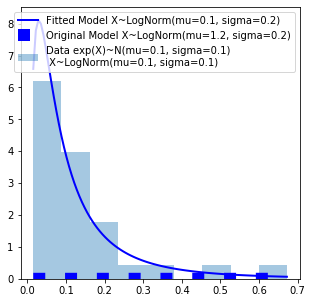

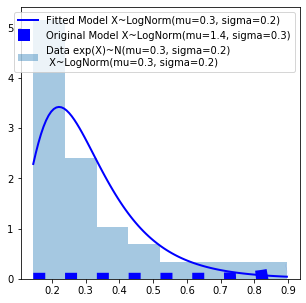

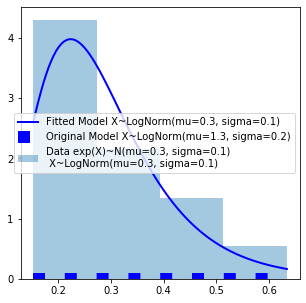

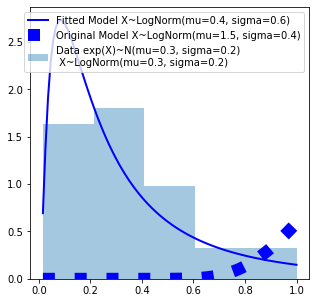

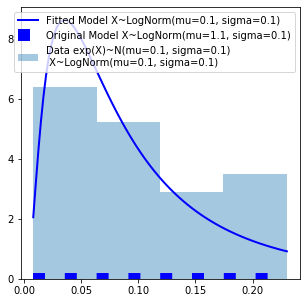

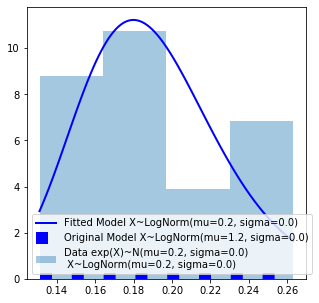

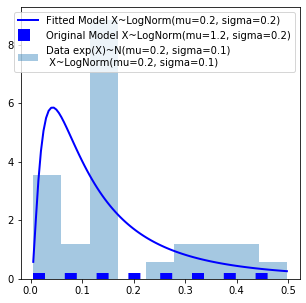

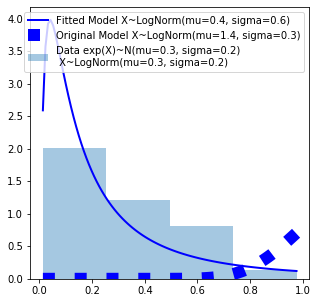

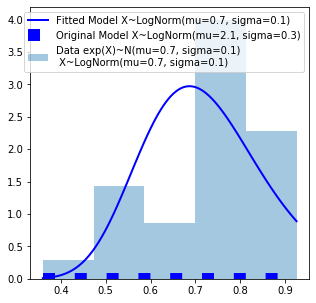

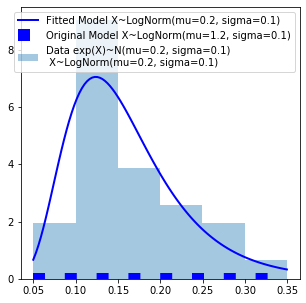

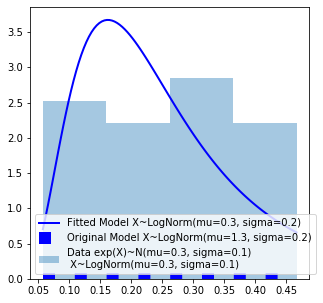

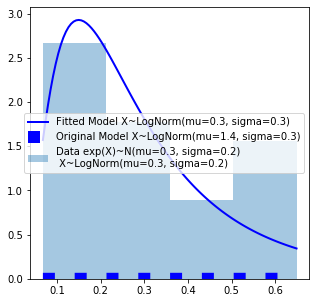

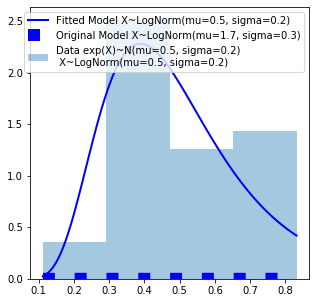

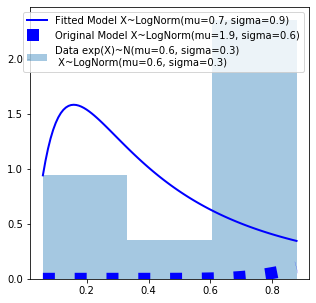

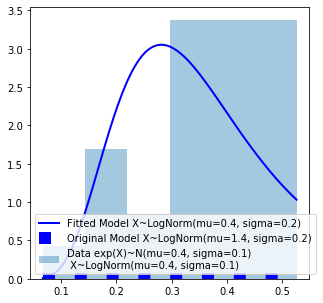

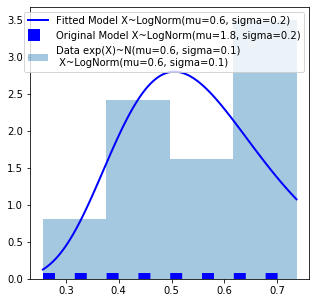

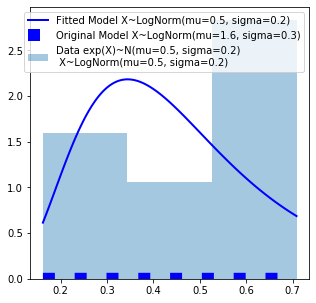

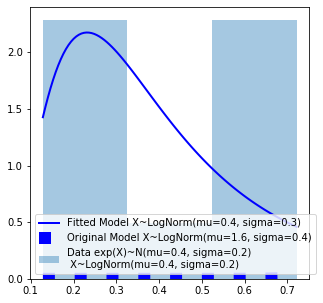

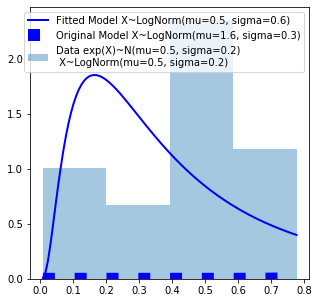

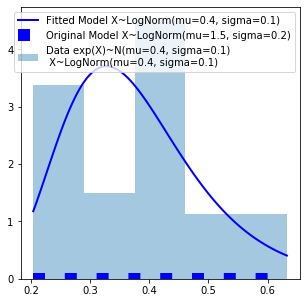

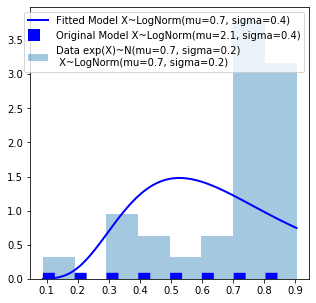

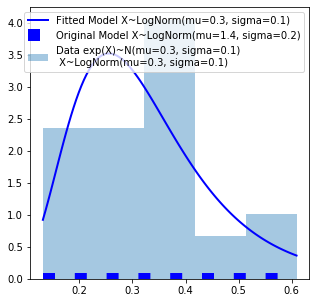

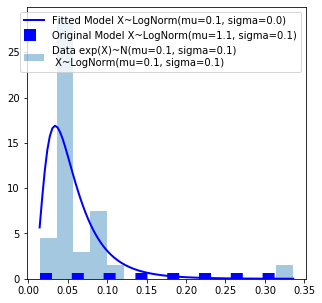

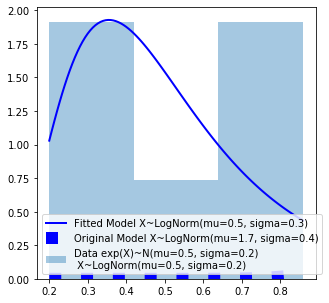

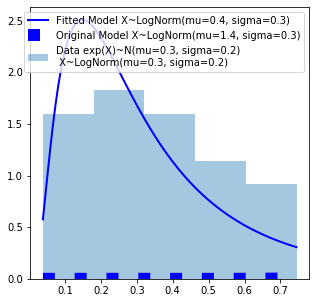

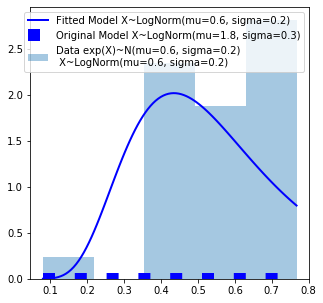

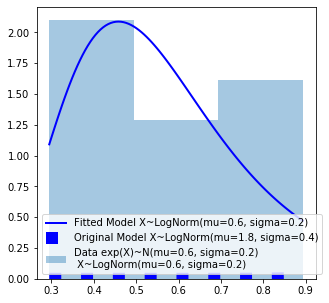

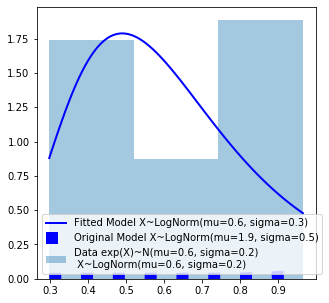

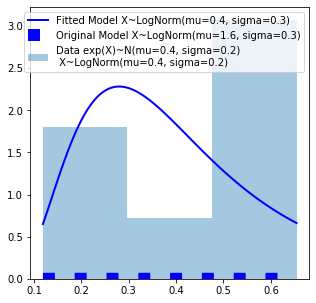

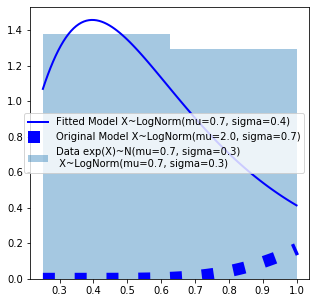

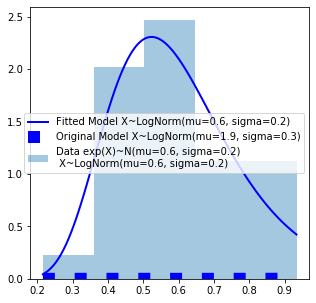

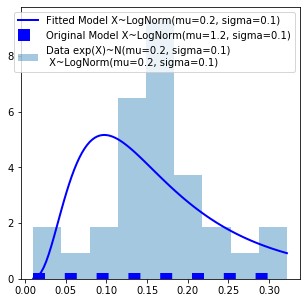

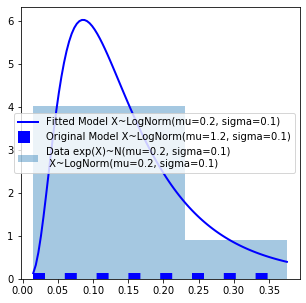

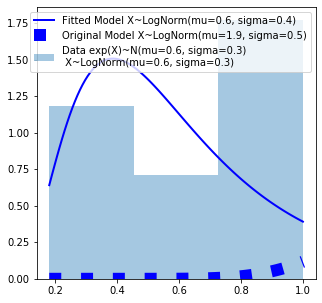

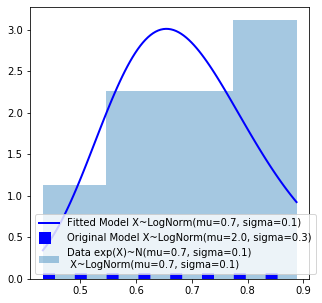

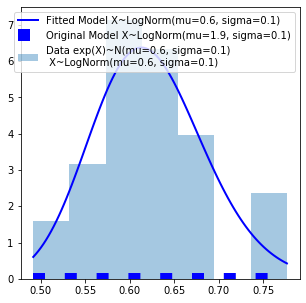

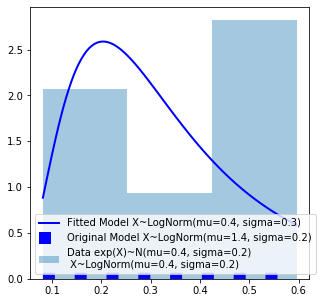

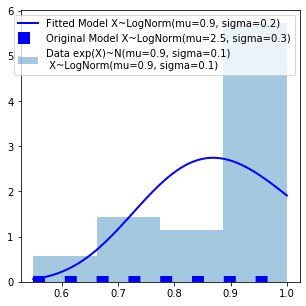

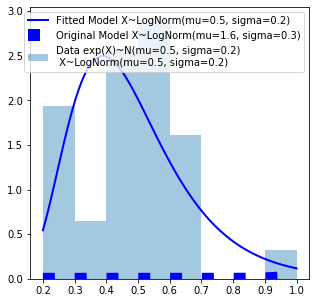

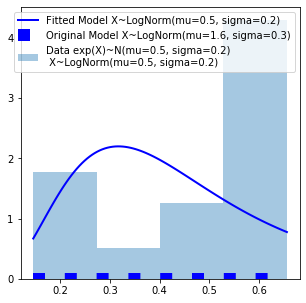

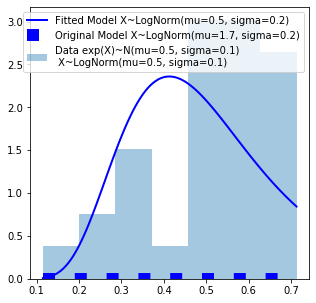

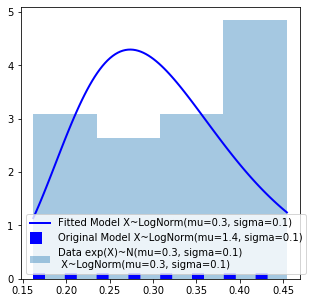

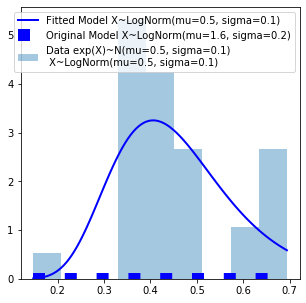

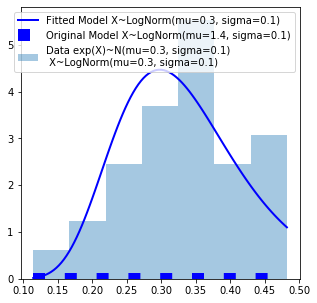

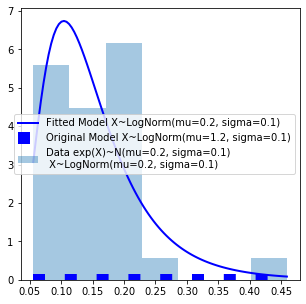

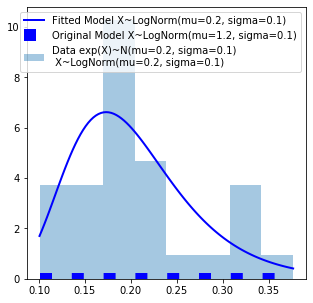

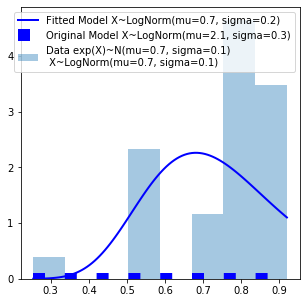

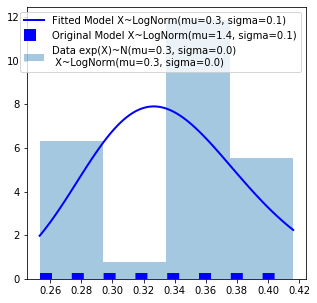

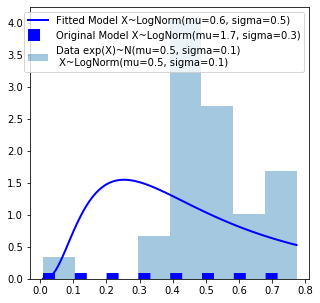

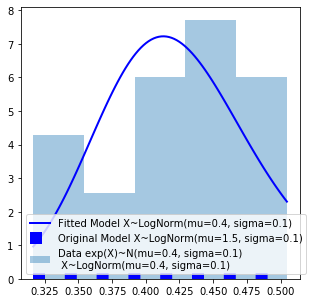

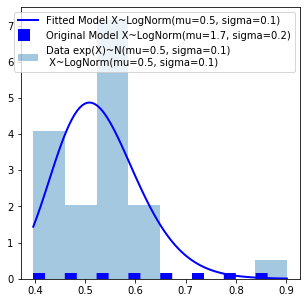

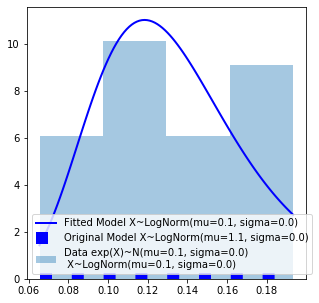

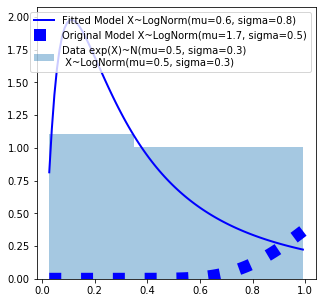

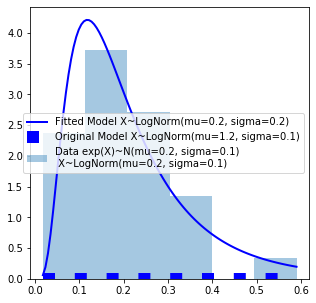

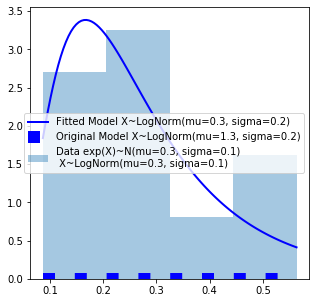

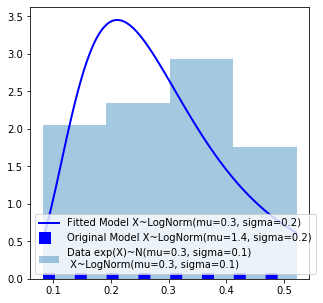

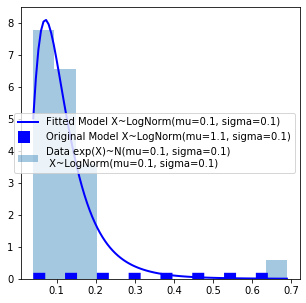

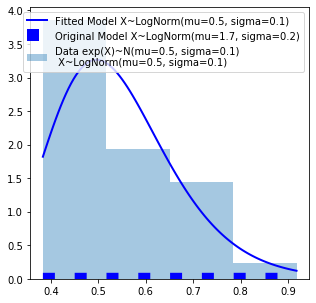

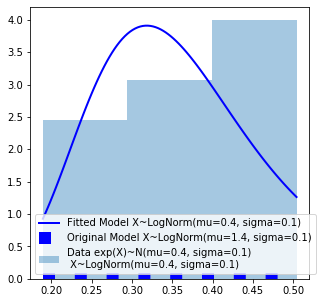

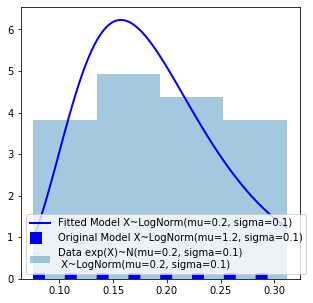

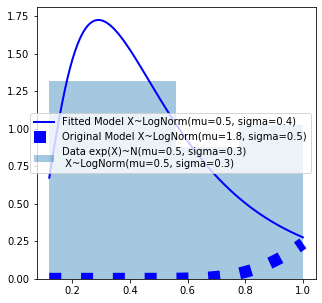

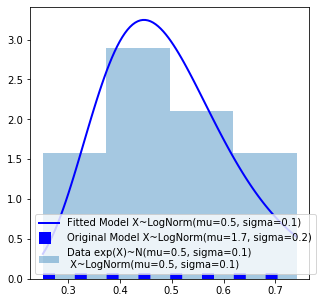

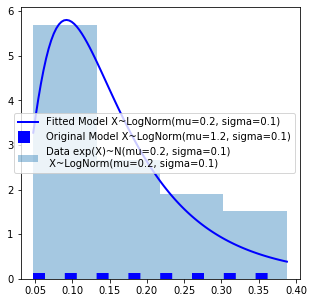

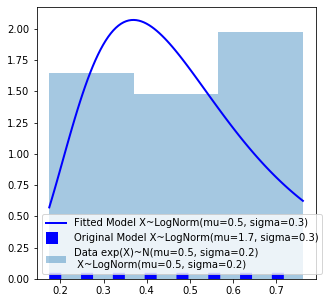

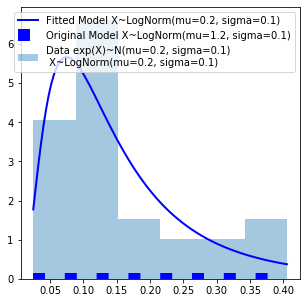

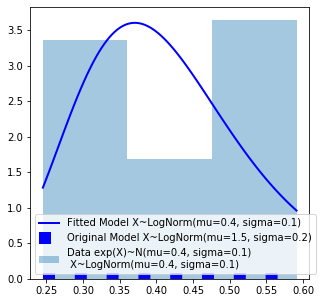

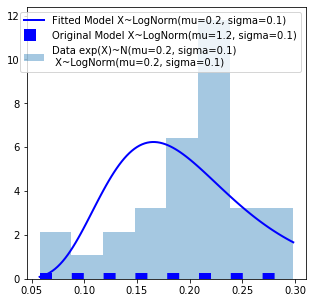

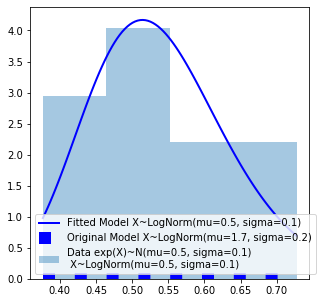

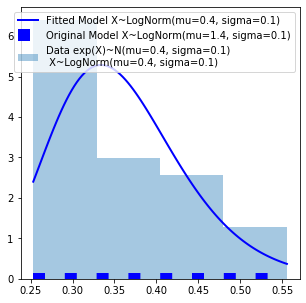

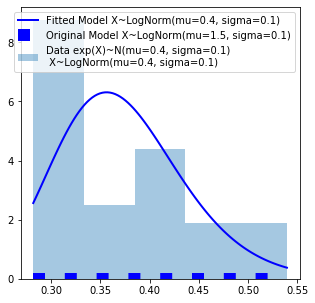

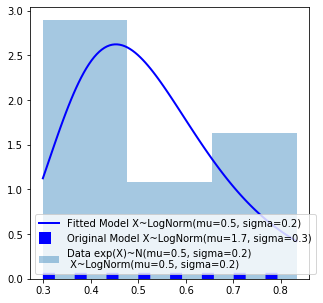

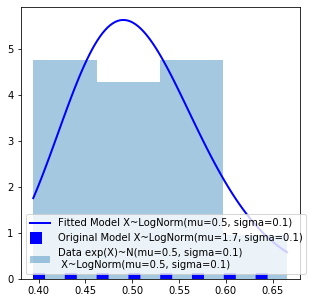

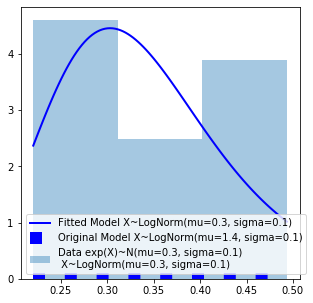

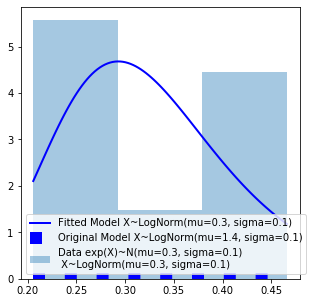

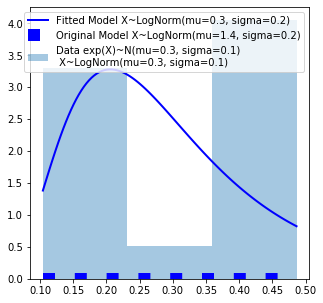

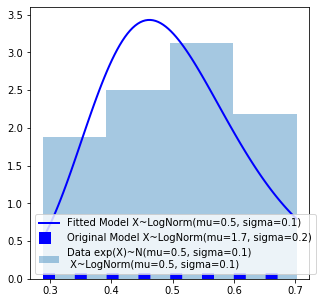

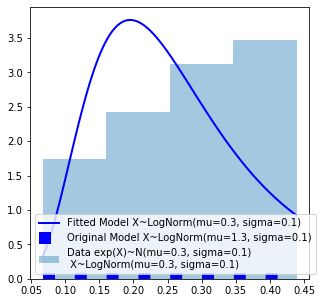

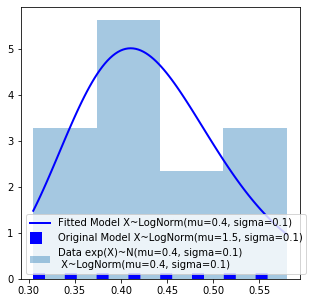

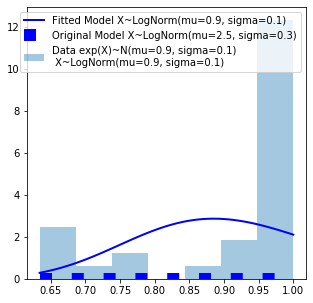

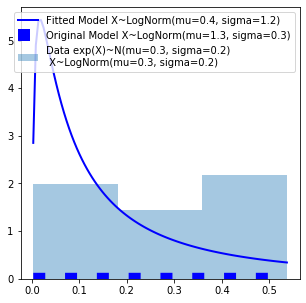

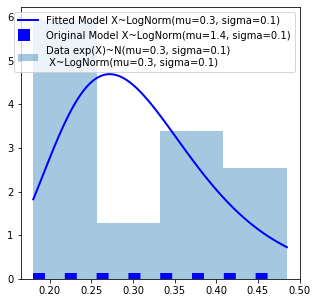

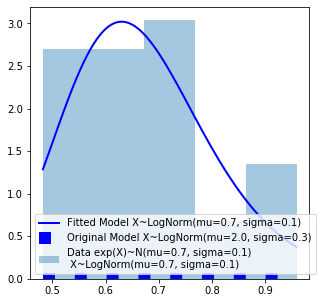

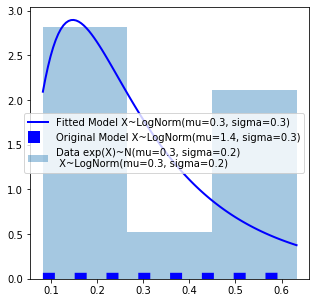

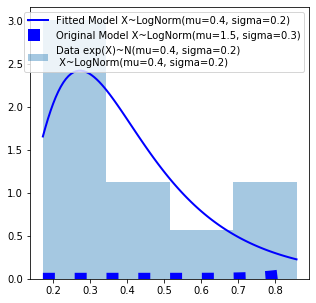

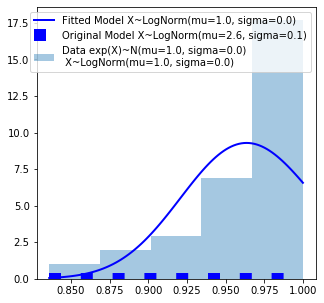

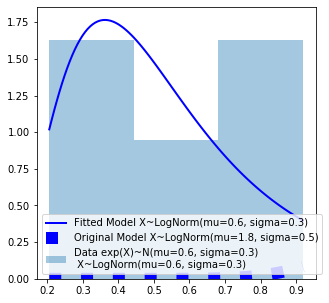

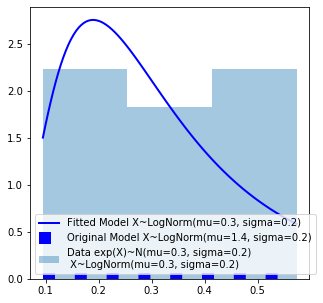

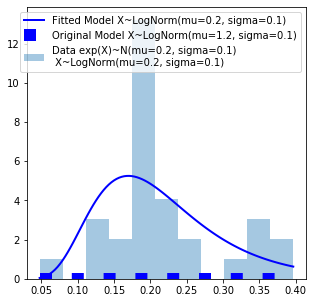

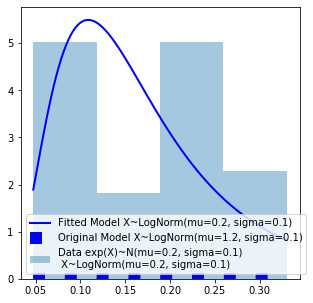

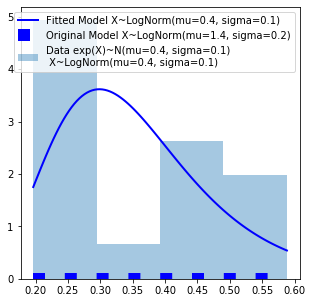

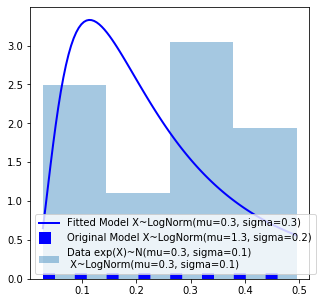

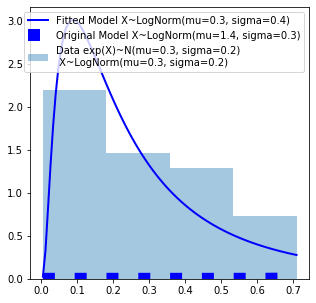

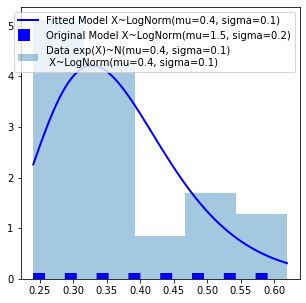

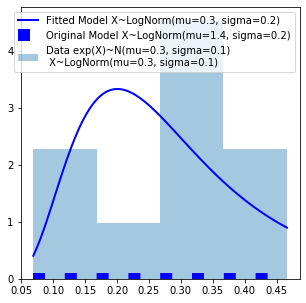

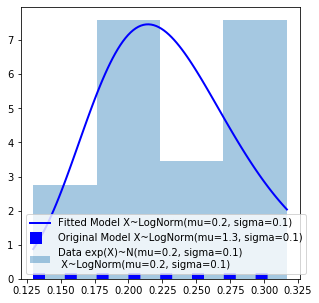

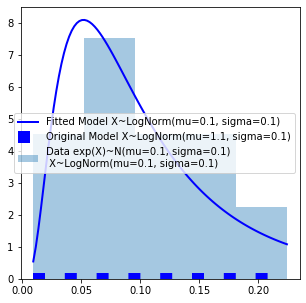

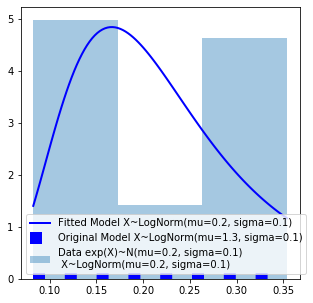

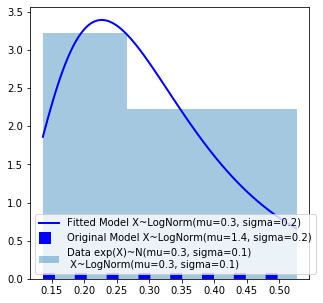

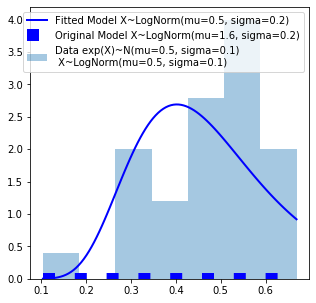

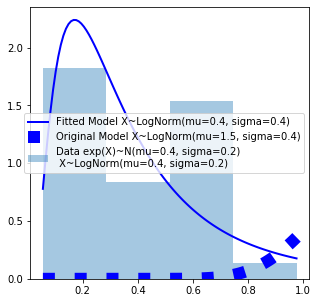

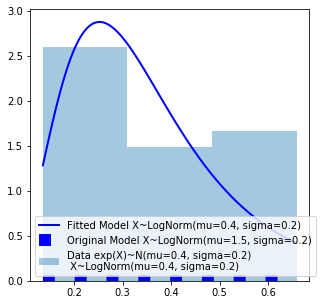

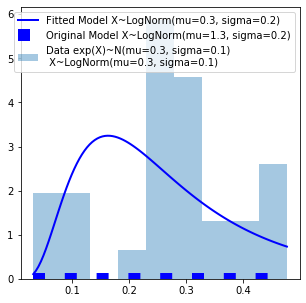

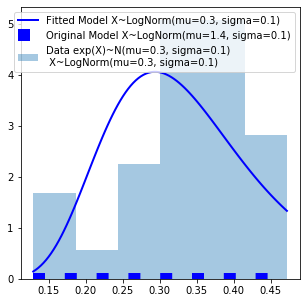

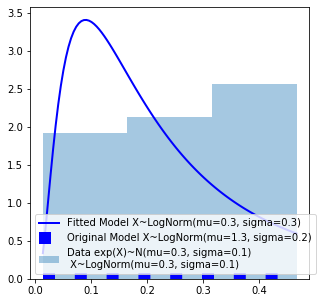

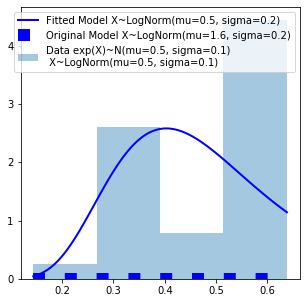

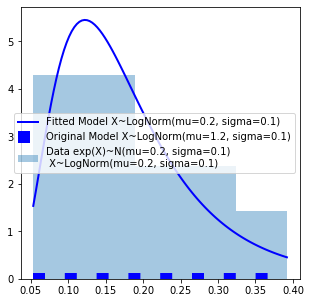

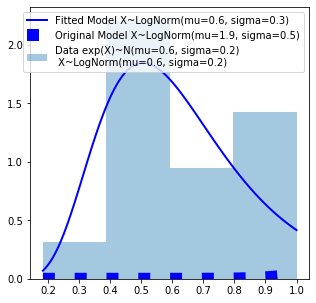

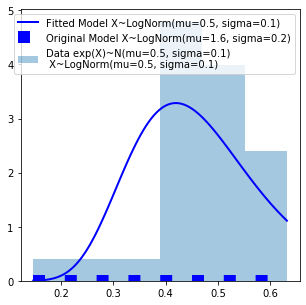

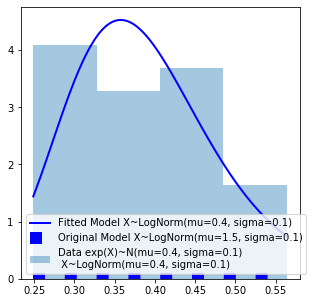

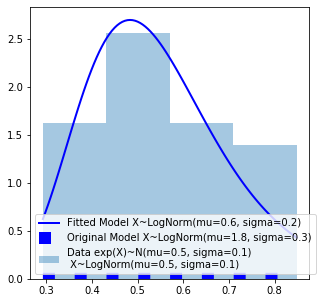

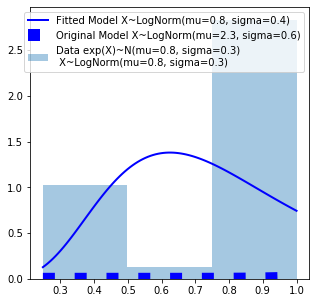

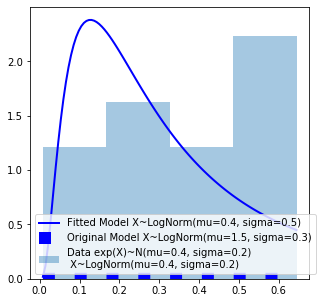

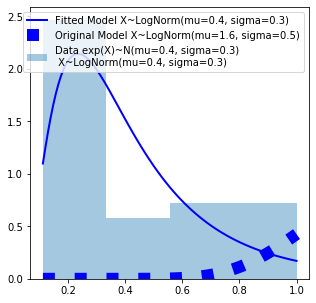

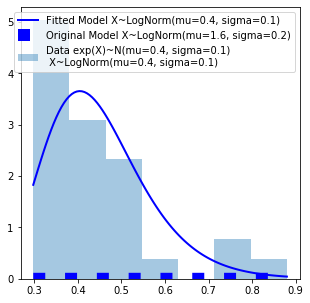

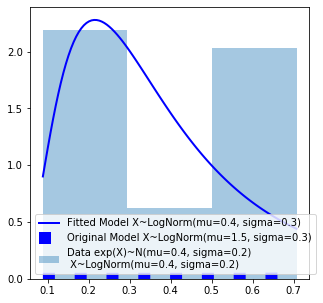

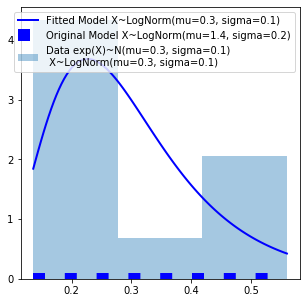

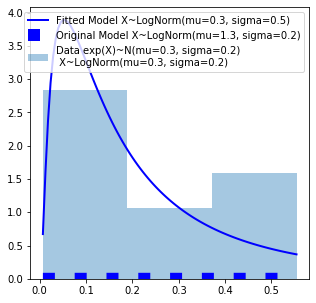

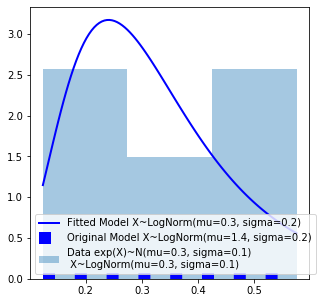

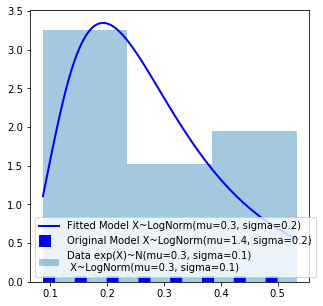

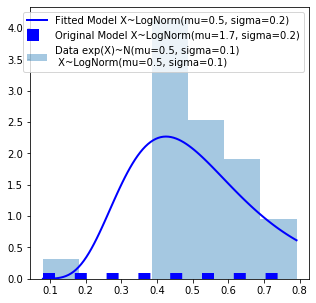

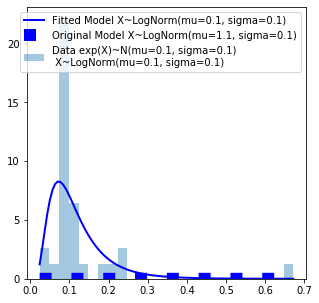

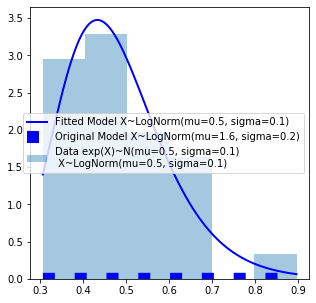

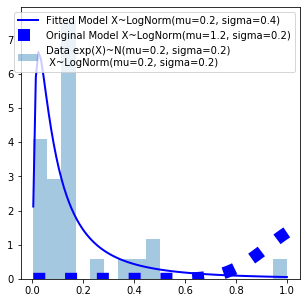

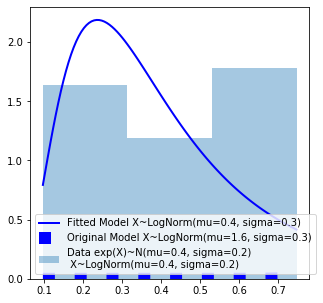

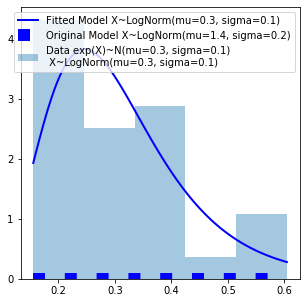

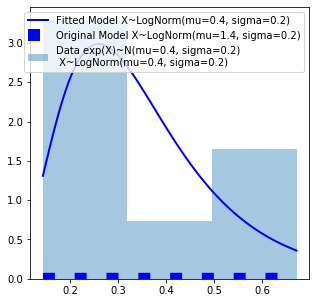

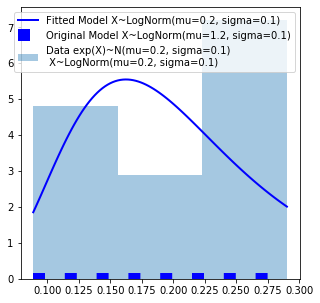

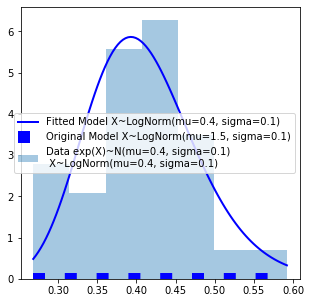

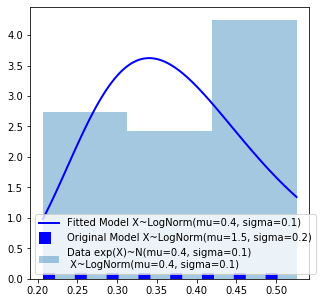

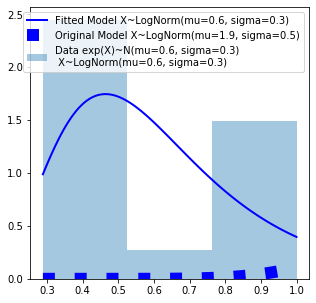

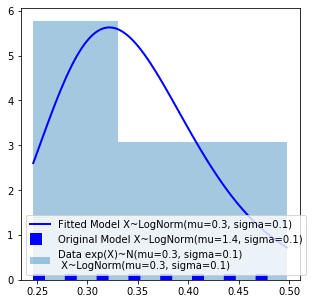

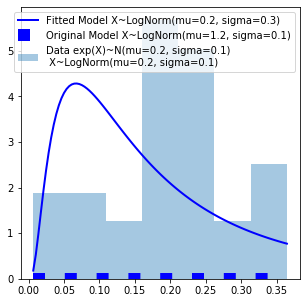

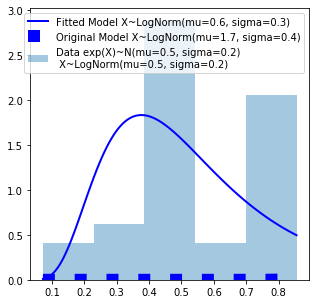

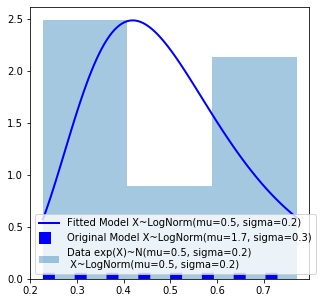

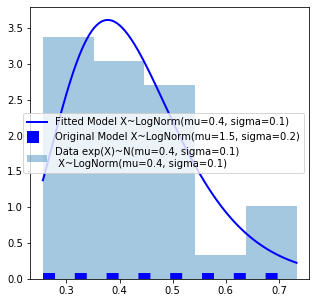

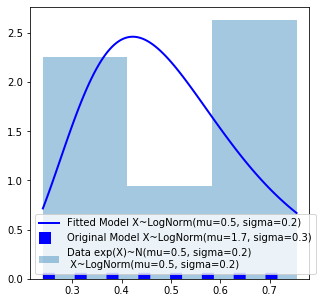

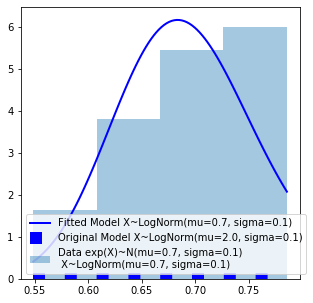

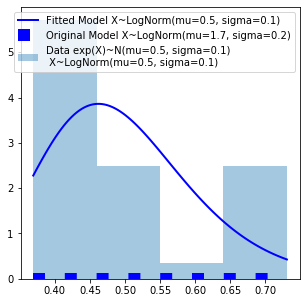

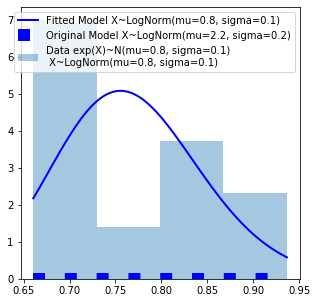

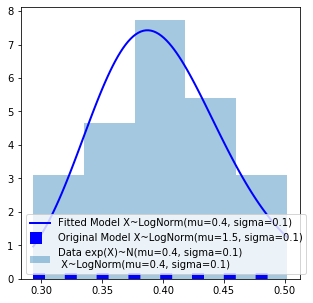

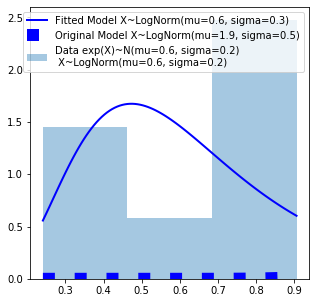

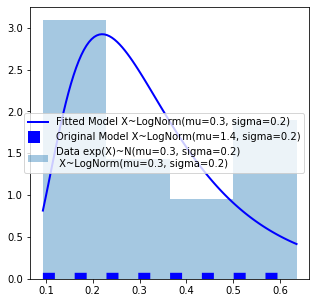

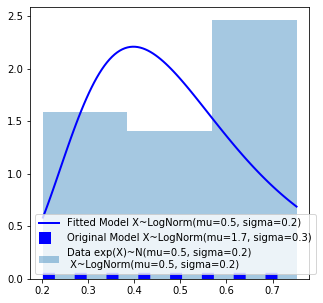

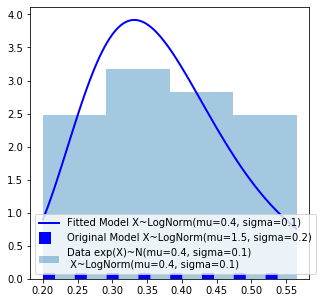

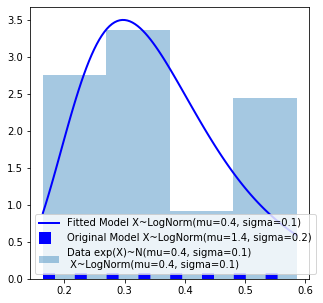

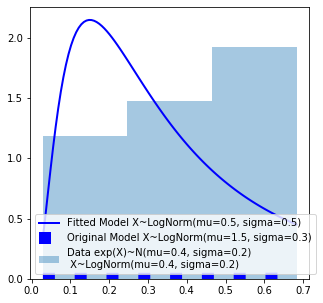

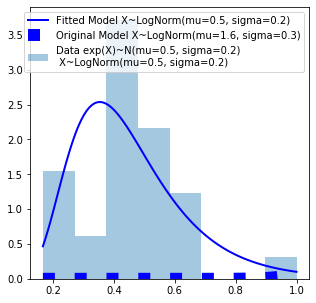

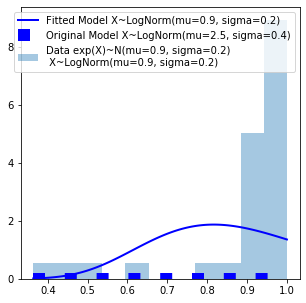

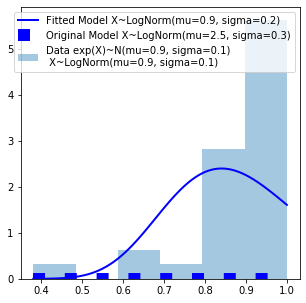

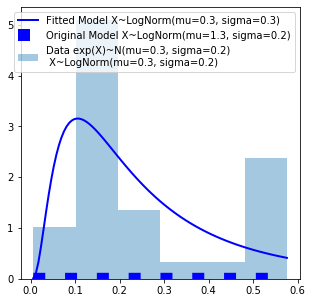

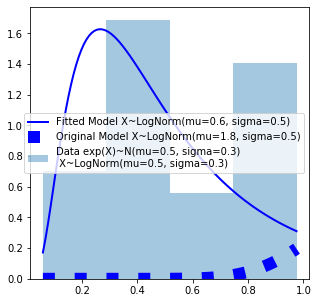

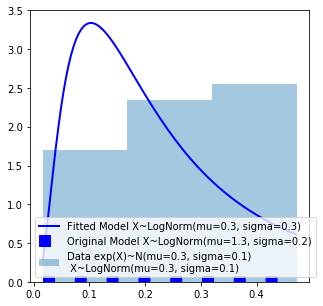

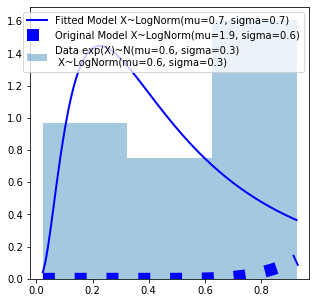

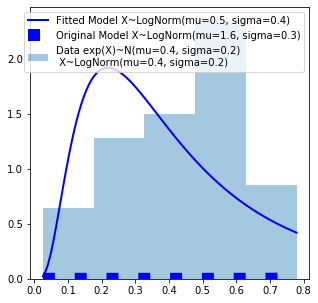

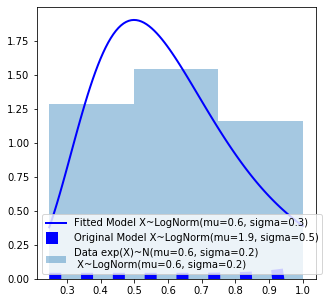

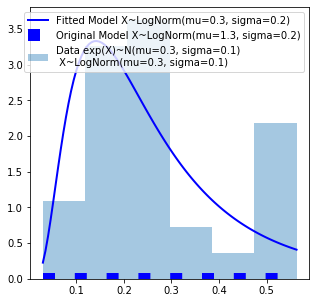

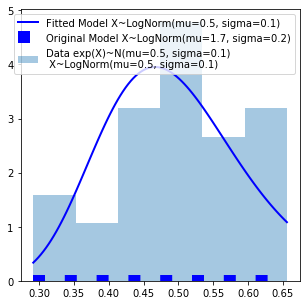

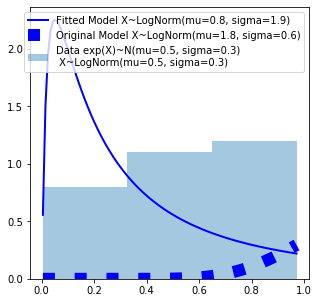

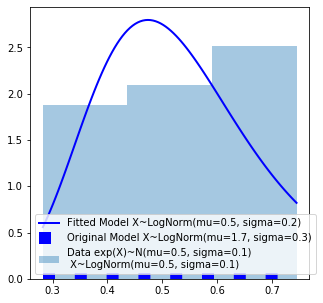

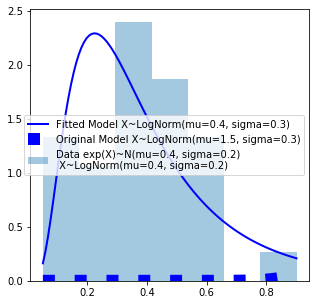

In [457]:
import seaborn as sns

lognorm_mean_list = []
lognorm_std_list = []
df_list = [CGMSeriesLunchPat1Scaled, CGMSeriesLunchPat2Scaled, CGMSeriesLunchPat3Scaled, 
           CGMSeriesLunchPat4Scaled, CGMSeriesLunchPat5Scaled]

# Preprocessing for distribution value to lie in between x and inf
for df in df_list:
    for i in range(len(df)):
        if np.isnan(df[i][30]):
            df[i][30] = df[i][29] + (df[i][28] - df[i][29])
            
for df in df_list:
    for i in range(len(df)):
        x = df[i]
        x[x == 0] = np.mean(x)
        mu = np.mean(x) 
        sigma = np.std(x)

        x_exp = x
        mu_exp = np.exp(mu)
        sigma_exp = np.exp(sigma)

        fitting_params_lognormal = scipy.stats.lognorm.fit(x_exp, floc=0, scale=mu_exp)
        lognorm_dist_fitted = scipy.stats.lognorm(*fitting_params_lognormal)
        t = np.linspace(np.min(x_exp), np.max(x_exp), 100)

        lognorm_dist = scipy.stats.lognorm(s=sigma, loc=0, scale=np.exp(mu))
        lognorm_mean_list.append(lognorm_dist.mean())
        lognorm_std_list.append(lognorm_dist.std())


        # Plot lognormals
        f, ax = plt.subplots(1, sharex='col', figsize=(5, 5))
        sns.distplot(x_exp, ax=ax, norm_hist=True, kde=False,
                     label='Data exp(X)~N(mu={0:.1f}, sigma={1:.1f})\n X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma))
        ax.plot(t, lognorm_dist_fitted.pdf(t), lw=2, color='b',
                label='Fitted Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist_fitted.mean(), lognorm_dist_fitted.std()))
        ax.plot(t, lognorm_dist.pdf(t), lw=12, color='b', ls=':',
                label='Original Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist.mean(), lognorm_dist.std()))
        ax.legend(loc='best')
        plt.show()

lognorm_std_list = np.asarray(lognorm_std_list)
lognorm_mean_list = np.asarray(lognorm_mean_list)

(186, 186)